ANN 인공신경망

채점 기준 (상, 중상, 중, 중하, 하)

1. Neural network의 개념을 설명하였는지

2. 실습에서 사용할 데이터의 size, 사용할 변수에 대한 설명과 기초통계, target 변수의 정의와 어떠한 task인지 (classification / regression 중 하나 선택) 설명

3. 하이퍼 파라미터 튜닝 (hidden layer, learning rate, optimizer)

- 각 기준 당 2개 이상의 하이퍼파라미터 설정

4. Earlystopping 등 callback 사용을 포함하여 모델마다 적절한 epochs 값 결정 (해당 값 제시)

5. 신경망 모델에서 각 노드의 변수가중치(weight) 확인

6. 여러 모델을 실험 (loss, metrics 해석) 하고 최적의 성능을 가지는 결과를 제시 (validation set을 구분하거나 cross validation 설정)



** 각 모델마다 선택한 parameter를 모두 보고서에 서술해주세요 (epoch, batch size, learning rate, #node, layer 등)



# Neural Network

딥러닝에서 가장 기본이 되는 개념은 바로 신경망(Neural Network)입니다.

신경망이란 인간의 뇌가 가지는 생물학적 특성 중 뉴런의 연결 구조를 가리키며, 이러한 신경망을 본떠 만든 네트워크 구조를 인공신경망(Artificial Neural Network, ANN)이라고 부릅니다.

인공신경망은 여러 뉴런이 서로 연결되어 있는 구조의 네트워크이며, 입력층(input layer)를 통해 학습하고자 하는 데이터를 입력받게 됩니다.

이렇게 입력된 데이터들은 여러 단계의 은닉층(hidden layer)을 지나면서 처리가 이루어져 출력층(output layer)을 통해 최종 결과가 출력되게 됩니다.

참고: http://www.tcpschool.com/deep2018/deep2018_deeplearning_intro

Neural Network 학습 방법

1) Hebbian Learning (Hebbian Rule)

2) Perceptron Rule

3) Gradient Descent (Delta Rule, Least Mean Square)

4) Back propagation


1) Hebbian Learning 

기본 신경망 학습 규칙으로, 원래 무감독 학습 방법에 쓰는 것이었다.

* 아이디어 -> 만일 어떤 신경세포의 활성이 다른 신경세포가 활성하는 데 계속적으로 공헌한다면, 두 신경세포 간의 연결 가중치를 증가시켜야 한다.
즉 두개의 뉴런이 모두 켜져 1이되면(둘다 활성화시), 둘사이의 weight를 증가시킨다는 법칙. 로컬하게 오직 2개의 뉴런의 관계만을 갖고 학습하는 방법.

2) Perceptron Rule

두개의 뉴런간의 weight를 학습할때 목적패턴과의 오차를 이용하는 학습 방법. 오차가 발생했을때 입력이 1인 뉴런에대해서만 오차만큼 학습을 시킨다.

3) Gradient Descent(Delta Rule, Least Mean Square)

파라미터에 대한 error를 계산하는 함수(=Objective Function=Loss Function)을 잘 정의하고, 이 함수가 최소화되는 방향을 찾아서 점점 나아가는 것이다

4)Back propagation

Delta Rule을 Multi Layer Perceptron 즉, 여러 계층을 가진 Neural Network 에 적용하기위해 고안된 알고리즘. 

각 노드에 대한 partial error를 계산후 feed backward(역순으로 Error를 학습한다)

# Data 설명 (Classification)

Fashion MNIST 데이터셋은 아래 그림과 같이 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음이다. 실습시간에 다루었던 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28×28 픽셀의 이미지 70,000개로 이루어져 있습니다.
이번 실습과제에서는 Dense 층들로 구성되는 Fully-Connected Neural Network (완전 연결된 인공신경망)을 이용해서 Fashion MNIST 데이터셋을 분류해보고자 한다.

https://codetorial.net/tensorflow/fashion_mnist_classification.html

https://www.kaggle.com/code/arezoodahesh/fashion-mnist-cnn-model

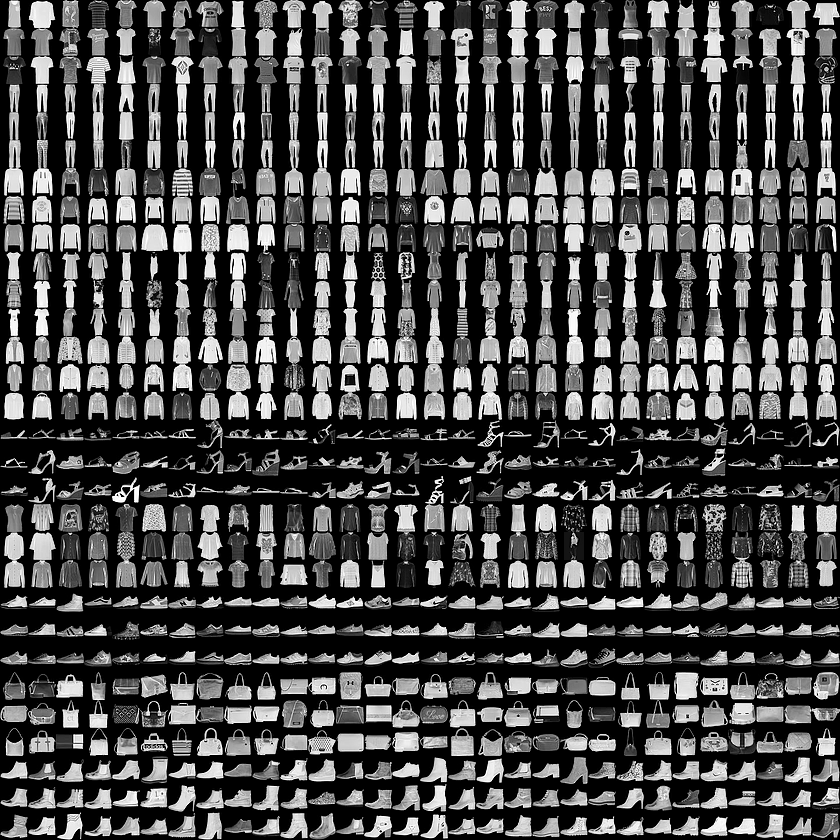

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import tensorflow as tf

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


기초통계량

학습 데이터셋과 테스트 데이터셋은 각 카테고리별로 각각 6,000개와 1,000개의 이미지들로 구성되어 있습니다. 카테고리 개수는 10개이기에, 학습 데이터는 총 60,000개의 이미지들로 테스팅 셋은 10,000개 이미지들을 가지고 있습니다.

train: 60000개의 이미지가 있고, 한 이미지가 28x28개의 pixels로 구성.

test: 10000개의 이미지가 있고, 한 이미지가 28x28개의 pixels로 구성.

(각 픽셀은 0~255 중 한 숫자를 가지는데, 255에 가까울수록 흰색을 의미)

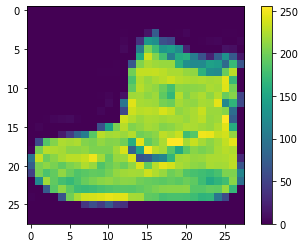

In [ ]:
# 어떤 이미지인지 확인
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

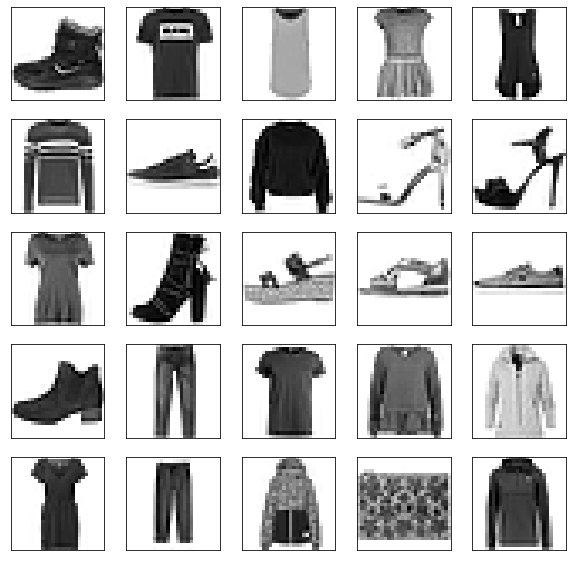

In [ ]:
# 일부 패션 확인
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [ ]:
print(train_images[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

train_images는 0에서 255 사이의 값을 갖는 28x28 크기의 NumPy 어레이를 갖는 어레이

In [ ]:
print(train_labels[0])

9


0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블입니다. 각각의 레이블과 클래스는 아래와 같다.

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

In [ ]:
# Input scaling
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_labels는 0에서 9까지의 정수 값을 갖는 어레이다.

0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블이다. 각각의 레이블과 클래스는 아래와 같다.

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 선택하는 것이고, 셋 이상의 클래스로 분류하므로 다중분류(multiclass classification)이다. 


In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
# One-hot Encoding
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 원래의 종속변수를 담고 있는 array는 벡터, 즉 각 원소가 한개 이미지의 종속변수 값 (0 ~ 9) 을 취함

In [ ]:
print(test_labels_one_hot.shape)
print(test_labels[0])
print(test_labels_one_hot[0]) 

(10000, 10)
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# 하이퍼파라미터 튜닝

하이퍼 파라미터 튜닝 (hidden layer, learning rate, optimizer)

- 각 기준 당 2개 이상의 하이퍼파라미터 설정

**하이퍼 마라미터튜닝**

-학습 알고리즘을 위한 최적의 하이퍼파라미터 세트를 선택하는 것 

-모델 성능에 큰 영향을 주는 요소이기 때문에 신경망 설계나 분석에 있어서 필수적으로 시행해야 한다.

-**종류** 

1.batch_size : 배치 크기 

너무 작은 경우 , 데이터가 잘게 쪼개져 학습시간이 길고 , 너무 클 경우 모든 데이터 loss 계산시 계산해야 하는 양 많은 문제가 있다

=>batch size는 32-512까지 2의 제곱수로 변화사키며 Tuning

2.epochs : 에포크, training epochs라고도 불리며 반복 학습 횟수를 의미한다.

=> epoch를 바꿔가며 Tuning해보고,  Early stopping을 활용하여 일정 횟수동안 성능개선이 되지 않는다면 Epoch를 조기 종료할 수 있다.

3.optimizer : 옵티마이저 (최적화도구) , loss함수의 최솟값을 찾기 위한 기능 

=>Adam, SGD, RMS Prop 등 바꿔가며 Tuning


4.learning rate : 학습률,gradient의 방향으로 얼마나 빠르게 이동할 것인지 결정하는 변수,

=>너무 높은 경우, 발산 너무 낮은 경우, 학습속도 느리며 최저점 찾는데 실패할 수 있으므로 학습률 수치를 바꿔가며 Tuning

5.activation functions : 활성화 함수

=> 보통 은닉층에서 Relu 사용, 출력층에서 Signod나 Softmax 사용

   활성화 함수 바꿔가며 Tuning

6.regularization(weight decay, dropout 등) 
-드롭 아웃(drop out) : 학습 중 무작위로 비활성화 하고 싶은 뉴런 비율

-가중치 감소(wieght decay) : 과적합 방지를 위해 학습 규제 전략의 하나로 말 그대로 가중치를 감소시키는 기술

=> drop out 수치를 바꾸거나 , 가중치를 감소시키며 Tuning

7.은닉층(hidden layer)의 수, 은닉층의 노드(node) 수: layer가 너무 많아질 경우 과적합이나, 학습시간의 문제가 있다.

=> 은닉층의 수나 ,은닉층의 노두 수를 바꿔가며 Tuning (보통 layer의 수가 노드의 수 보다 중요)

참고사이트:https://velog.io/@qksekf/%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%95%98%EC%9D%B4%ED%8D%BC-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8A%9C%EB%8B%9DETF-Keras-Tuner

https://daje0601.tistory.com/197
https://velog.io/@qksekf/%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%95%98%EC%9D%B4%ED%8D%BC-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8A%9C%EB%8B%9DETF-Keras-Tuner

https://vision-ai.tistory.com/entry/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-%EB%94%A5%EB%9F%AC%EB%8B%9D-GridSearchCV-%EC%9D%B4%EC%9A%A9-%EB%B0%A9%EB%B2%95

https://sevillabk.github.io/1-early-stopping/

 early stopping

epoch, batch size, learning rate, #node, layer

## Base Model: hidden layer 2개 (노드: 각 32개, 8개), lr:0.01, batch size:1024, epoch: 300 (early stopping 42), optimizer: RMSprop

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=0.01),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


47/47 [==============================] - 1s 14ms/step - loss: 1.4702 - accuracy: 0.4976 - val_loss: 0.9780 - val_accuracy: 0.6603 - lr: 0.0100
Epoch 2/300
47/47 [==============================] - 0s 10ms/step - loss: 0.7734 - accuracy: 0.7129 - val_loss: 0.9406 - val_accuracy: 0.6323 - lr: 0.0100
Epoch 3/300
47/47 [==============================] - 0s 10ms/step - loss: 0.6651 - accuracy: 0.7497 - val_loss: 0.8809 - val_accuracy: 0.6787 - lr: 0.0100
Epoch 4/300
47/47 [==============================] - 0s 10ms/step - loss: 0.6089 - accuracy: 0.7699 - val_loss: 0.7287 - val_accuracy: 0.7553 - lr: 0.0100
Epoch 5/300
47/47 [==============================] - 0s 10ms/step - loss: 0.5575 - accuracy: 0.7913 - val_loss: 0.4879 - val_accuracy: 0.8249 - lr: 0.0100
Epoch 6/300
47/47 [==============================] - 0s 10ms/step - loss: 0.5281 - accuracy: 0.8059 - val_loss: 0.4895 - val_accuracy: 0.8213 - lr: 0.0100
Epoch 7/300
47/47 [==============================] - 0s 10ms/step - loss: 0.5058 -

Early Stopping Model을 사용하였기 때문에 
Epcoh 32에서 val_loss가 0.3857로 최소가 된후 10번의 추가 Epoch에서 



Val_loss의 최솟값이 더이상 감소하지 않았다. 따라서 모델을 조기 종료하고 epoch 32일때가 최적 Epoch임을 확인하였다.

최적 Epoch일때 loss=0.3540 , accuracy: 0.8675 ,val_loss= 0.3857, val_accuracy= 08656 임을 알 수 있었다.

In [ ]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


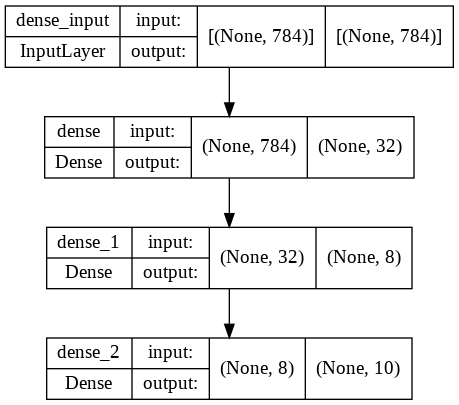

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

총 784개의 input node( 28*28의 input shape를 설정) , Hidden Layer의 노드를 각각 32,8로 설정하였으며,

Output Layer의 ndoe를 10개(Class의 수)의 output node로 설정하였다.

설정한대로 Hidden Layer가 형성되었다.

In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-8.09719980e-01,  4.94854540e-01,  3.05510312e-03, ...,
         -1.76002070e-01,  1.61253214e-02, -2.39122912e-01],
        [-8.27466846e-01, -1.05962241e+00, -2.66186092e-02, ...,
         -4.09606919e-02, -2.46853363e-02, -6.14739180e-01],
        [ 1.38537973e-01, -1.35663021e+00, -3.33875492e-02, ...,
         -2.08985567e+00, -4.78891283e-02, -3.10386252e+00],
        ...,
        [ 1.58992076e+00, -3.06309879e-01, -1.07664704e-01, ...,
         -3.02073836e-01, -6.65581971e-02,  2.80168712e-01],
        [ 1.87061298e+00, -9.08204839e-02,  4.82893363e-03, ...,
          3.49081278e-01, -5.15805483e-02, -1.20263231e+00],
        [ 1.30419028e+00, -1.74129999e+00,  1.05970055e-01, ...,
          1.33889639e+00, -5.50260022e-02, -5.52750051e-01]], dtype=float32),
 array([-5.0887156e-01,  1.0728895e-01, -6.3112959e-02, -6.2027786e-02,
         1.1959229e+00, -3.1050712e-02,  5.9705132e-01, -6.3229993e-02,
         7.9743052e-01, -4.7758222e-06, -6.3094556e-02,  6.9100904e-01

대표적으로 Hidden Layer(노드:32)->Hidden Layer(노드:8)인 경우와 Hidden Layer(노드:8)->Output Layer(노드:10)인 경우 

첫 노드의 Weight와 전체 Bias를 확인한다. 

 Hidden Layer(노드:32)->Hidden Layer(노드:8)인 경우 

Weight

[2.02470779e-01,  2.90085543e-02, -1.12444535e-01,-7.44862556e-01,  7.25184083e-02, -2.50116795e-01,
         -1.25660419e-01,  5.22484966e-02] 

Bias

[-0.28075936,  0.59166557,  0.4478156 ,  1.3405627 , -0.22665074,
         0.4648833 ,  0.16539967,  0.35749945]

Hidden Layer(노드:8)->Output Layer(노드:10)인경우

Weight

[-0.60187125,  0.5645374 , -0.5862635 , -0.76697516, -0.51249254,
         -3.092519  , -0.6306695 , -3.1489406 , -0.26125485, -3.7041967 ]

Bias

[-0.07425919, -0.17175056,  0.7673901 ,  0.40697396, -0.64147055,
         0.85904163,  0.5142598 ,  0.37118128, -0.88338786, -1.7916051 ]

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

0         1         2         3         4         5         6   \
0   -0.809720  0.494855  0.003055  0.049214 -0.090070  0.028279  0.719156   
1   -0.827467 -1.059622 -0.026619 -0.014533 -0.483560  0.237790  0.724418   
2    0.138538 -1.356630 -0.033388 -0.020188 -0.649682  0.185497  0.580168   
3   -1.523344 -2.376397 -0.080696 -0.049136 -1.070340 -0.020673  0.351934   
4   -0.553641 -2.251347 -0.110472  0.058942 -1.326349 -0.192018 -0.647112   
..        ...       ...       ...       ...       ...       ...       ...   
779  1.718681  0.499962  0.056518  0.091601  0.910904  0.165438 -1.709025   
780  2.212614 -0.034381 -0.036227 -0.022374  1.078499  0.139423  0.941801   
781  1.589921 -0.306310 -0.107665 -0.065673  0.311672 -0.308986  0.363330   
782  1.870613 -0.090820  0.004829 -0.081952  1.069363  0.038734  0.818052   
783  1.304190 -1.741300  0.105970 -0.061057 -0.209082  0.962475  0.681690   

           7         8         9   ...        22        23        24  \
0   -0.043060  0.034068 -0.063100  ...  0.826623 -0.143681  0.055611   
1   -0.043201 -0.130574  0.006361  ...  1.368632 -0.287479  0.219884   
2    0.025283  0.269306 -0.054698  ...  1.671368 -0.077040 -0.976882   
3    0.012530  0.380587  0.013575  ...  0.059472 -1.065711 -0.261068   
4    0.037025  0.467137 -0.030716  ... -0.061572 -0.681045  1.563664   
..        ...       ...       ...  ...       ...       ...       ...   
779 -0.002857 -0.482139 -0.035294  ...  0.710970  0.843590  0.758328   
780  0.048068  0.076202 -0.002495  ...  2.056461  0.829853  0.561020   
781  0.040069  0.092614 -0.089771  ...  0.477798  0.994850  1.020015   
782  0.023847  0.155165  0.018364  ...  0.874501  1.977507 -0.617721   
783  0.047408 -0.033067  0.056866  ...  1.192221 -0.042956  0.267152   

           25        26        27        28        29        30        31  
0   -0.002460 -0.648573  1.189180 -0.021526 -0.176002  0.016125 -0.239123  
1   -0.343883  0.719816 -0.337650 -0.007887 -0.040961 -0.024685 -0.614739  
2   -0.297434  0.652557 -0.898394 -0.068492 -2.089856 -0.047889 -3.103863  
3    0.146756  0.021556 -0.338644  0.066607 -1.016046  0.010787 -0.695589  
4   -0.696797 -1.512838  0.464107 -0.092908 -2.094138  0.030478 -0.913309  
..        ...       ...       ...       ...       ...       ...       ...  
779 -0.115152 -0.498147 -1.340303  0.022671  0.253575 -0.001794  0.714510  
780 -0.502448 -0.205294 -0.654144 -0.010177  0.464551  0.036118 -0.508150  
781  0.440950  0.168220 -1.783887  0.008912 -0.302074 -0.066558  0.280169  
782 -0.120115 -0.067438 -1.134781  0.051464  0.349081 -0.051581 -1.202632  
783 -0.046783 -0.164264 -1.533546 -0.108383  1.338896 -0.055026 -0.552750  

[784 rows x 32 columns]

In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

0
0  -0.508872
1   0.107289
2  -0.063113
3  -0.062028
4   1.195923
5  -0.031051
6   0.597051
7  -0.063230
8   0.797431
9  -0.000005
10 -0.063095
11  0.691009
12 -0.025241
13  0.859725
14 -0.031622
15  0.343875
16  1.336571
17 -0.031622
18 -0.048260
19 -0.019570
20 -0.063094
21  1.106011
22  0.959203
23  0.342356
24 -0.217222
25  0.845775
26 -0.157262
27  0.672756
28 -0.031620
29 -0.162153
30 -0.069013
31 -0.354374

In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

0         1         2         3         4         5         6  \
0   0.202471  0.029009 -0.112445 -0.744863  0.072518 -0.250117 -0.125660   
1   0.161321  0.312894 -0.112976  0.327681  0.592833  0.359634 -0.314263   
2  -0.057845 -0.110593  0.190132  0.001896 -0.088007  0.051272 -0.220259   
3  -0.222750  0.245945  0.281491 -0.305811 -0.185591  0.175187 -0.356264   
4  -0.799278 -0.225361 -1.516128  0.371896 -0.398706  0.669931  0.025215   
5   0.694444 -0.022682 -0.818995 -0.235642  0.174178  0.293153 -0.945081   
6   0.077622 -0.631808  0.242705 -0.350531  0.303276  0.255172 -1.025459   
7   0.190047  0.094933 -0.188293  0.184825 -0.055616 -0.344784 -0.083742   
8   0.607624 -0.073665  0.705196  0.071290 -0.713798 -0.100465 -0.542716   
9   0.221340  0.096773 -0.176682  0.256794 -0.292263 -0.244037  0.344414   
10 -0.031318  0.174591  0.288539  0.160260 -0.011675 -0.104779  0.029197   
11  0.159381  1.132492  0.400218  0.287039 -0.197856  0.372638 -0.056813   
12 -0.000990 -0.118735 -0.225872  0.010899 -0.165622 -0.180406  0.356850   
13 -0.641483  0.935021 -0.514673 -0.421736 -0.934839  0.733613 -0.093085   
14 -0.301905  0.251942 -0.017352 -0.156266  0.021512 -0.000306 -0.155436   
15 -0.395464  0.302616  0.450816 -0.186677 -0.057477  0.740848  0.755071   
16 -0.697662 -0.245403  0.328635  0.019096  0.421399  0.222430 -0.075713   
17 -0.178710 -0.313748  0.272426  0.147843 -0.072238 -0.276330 -0.265857   
18  0.048755 -0.223691 -0.328360 -0.034504  0.076820 -0.015433 -0.012744   
19 -0.750595 -0.289038 -0.149304  0.588287  0.440701  0.365935  0.029200   
20  0.301681 -0.255562 -0.098644  0.053548  0.365943  0.044250 -0.368242   
21  0.066468  1.248059 -0.147542 -0.438196 -1.274514  0.004963 -0.360045   
22  0.417563  0.073017  0.277725  0.142510 -0.176459 -0.227505  0.048660   
23 -0.516453  0.316706 -0.011070 -0.213373  0.579453 -0.197609 -1.199705   
24  0.081841 -0.668653  0.215352 -0.142527  0.020036 -0.119718 -0.093040   
25 -0.499327  0.842605  0.354127  0.080968 -0.755282  0.618309 -0.417348   
26 -0.405229  0.178665  0.053756 -0.714360 -0.022542  0.376681 -0.775523   
27 -0.397964  0.562254  0.313708 -0.353799  0.112484  0.215620  0.022975   
28  0.138464 -0.009065  0.149509  0.303508 -0.199917  0.376230  0.215721   
29 -0.706346 -0.096447  0.115640 -0.474932  0.144739  0.477439 -0.229422   
30  0.289036  0.312219 -0.122762  0.243529  0.298960 -0.314415  0.286471   
31  0.642579 -0.327829 -0.417792 -0.388555  0.180089  0.432982 -0.035514   

           7  
0   0.052248  
1  -0.367594  
2   0.355184  
3  -0.366031  
4   0.194417  
5   0.929741  
6  -1.028295  
7   0.150821  
8  -0.093154  
9   0.147375  
10 -0.019680  
11 -0.342377  
12 -0.019755  
13  0.148709  
14 -0.338108  
15 -0.068770  
16  0.504665  
17 -0.258011  
18 -0.097950  
19  0.211586  
20  0.229422  
21  0.267853  
22  0.654042  
23  0.104127  
24 -0.088372  
25 -0.880059  
26  1.058563  
27  0.036648  
28  0.066531  
29  0.108574  
30 -0.138787  
31  0.020666

In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

0
0 -0.280759
1  0.591666
2  0.447816
3  1.340563
4 -0.226651
5  0.464883
6  0.165400
7  0.357499

In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

loss,accuracy, val_loss, val_accuracy가 Epoch가 진행됨에 따라 어떻게 변하는지 확인한다.

 Ir(학습률=0.1로 고정)

In [ ]:
cls_history.history

{'accuracy': [0.4975624978542328,
  0.7128958106040955,
  0.749666690826416,
  0.7699375152587891,
  0.7912708520889282,
  0.8058958053588867,
  0.8144583106040955,
  0.8238750100135803,
  0.8295624852180481,
  0.8313541412353516,
  0.8399375081062317,
  0.8411250114440918,
  0.8453750014305115,
  0.8448749780654907,
  0.8510208129882812,
  0.8492916822433472,
  0.8557708263397217,
  0.8551666736602783,
  0.8552916646003723,
  0.8570833206176758,
  0.8606666922569275,
  0.8625208139419556,
  0.8616458177566528,
  0.8628749847412109,
  0.8662916421890259,
  0.8650624752044678,
  0.8676249980926514,
  0.8662708401679993,
  0.8685208559036255,
  0.8708333373069763,
  0.8695625066757202,
  0.867520809173584,
  0.8684583306312561,
  0.871999979019165,
  0.872041642665863,
  0.8751875162124634,
  0.8741458058357239,
  0.8737916946411133,
  0.8765416741371155,
  0.8741458058357239,
  0.87520831823349,
  0.8758333325386047],
 'loss': [1.4701859951019287,
  0.7733705043792725,
  0.6651459336280

accuracy는 epoch가 진행됨에 따라 계속 증가하지만, loss는 epcoh가 진행됨에 따라 계속 감소하지만

val_accuracy와 val_loss는 일정 Epoch이후 지속적으로 감소하거나 증가한다고 볼 수 없었다.

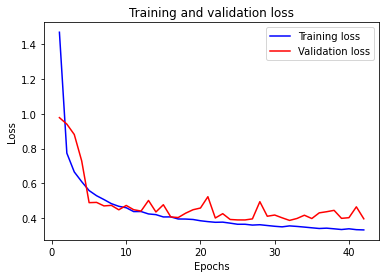

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tranning Loss는 지속적으로 감소하고 Validation Loss는 증가와 감소를 반복하고 있다. Epoch는 10 이후 그 차이가 조금씩 생기고 있기 때문에 적합한 모델이라고는 보기 힘들다

Validation Loss의 경우 Epoch=32에서 가장 작은 값을 보이고, 이때 Training Loss와 

가장 비슷할 것으로 에상된다.

Validation Loss로 Epcoh를 판단할 경우 Epoch=32가 된다.




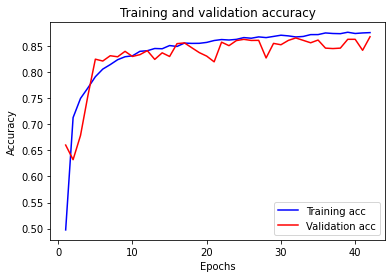

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Tranning Accuracy는 지속적으로 증가하고 Validation Accuracy는 증가와 감소를 반복하고 있다. Epoch는 10 이후 그 차이가 조금씩 생기고 있기 때문에 적합한 모델이라고는 보기 힘들다
Training accuracy는 지속적으로 증가하며

Valdation accuracy는 Epoch가 40일때 0.8679최댓값을 갖고 , Epcoh가 25일때 0.8629로 두 번째로 큰 값을 갖으며 

이 때 Training Accuracy와 가장 비슷할 것으로 예상된다.


Validation accuracy로 Epoch결정시 Epoch=40   또는 

반복횟수가 크다고 생각하여 줄이고 싶다면Epoch=25 .


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8554
test loss: 0.4155176877975464
test_accuracy: 0.855400025844574


# Hidden Layer

## Model1: hidden layer 1개 (노드: 각 32개, 8개), lr:0.01, batch size:1024, epoch: 300 (early stopping 31), optimizer: RMSprop


Base model 에서 epoch가 30이후로 Accuracy 가 감소하는 경향을 보였으므로, early stopping 을 31로 설정하였다. 

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(4, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=0.01),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


47/47 [==============================] - 1s 12ms/step - loss: 1.6968 - accuracy: 0.3640 - val_loss: 1.3677 - val_accuracy: 0.5033 - lr: 0.0100
Epoch 2/300
47/47 [==============================] - 0s 7ms/step - loss: 1.1594 - accuracy: 0.5713 - val_loss: 0.9782 - val_accuracy: 0.6277 - lr: 0.0100
Epoch 3/300
47/47 [==============================] - 0s 8ms/step - loss: 0.9412 - accuracy: 0.6577 - val_loss: 0.8156 - val_accuracy: 0.7297 - lr: 0.0100
Epoch 4/300
47/47 [==============================] - 0s 8ms/step - loss: 0.8452 - accuracy: 0.7057 - val_loss: 0.7928 - val_accuracy: 0.7169 - lr: 0.0100
Epoch 5/300
47/47 [==============================] - 0s 8ms/step - loss: 0.7906 - accuracy: 0.7267 - val_loss: 0.7295 - val_accuracy: 0.7594 - lr: 0.0100
Epoch 6/300
47/47 [==============================] - 0s 8ms/step - loss: 0.7683 - accuracy: 0.7306 - val_loss: 0.6907 - val_accuracy: 0.7653 - lr: 0.0100
Epoch 7/300
47/47 [==============================] - 0s 8ms/step - loss: 0.7323 - accur

Early Stopping Model을 사용하였기 때문에 
Epcoh 21에서 val_loss가 0.6166 으로 최소가 된후 10번의 추가 Epoch에서 



Val_loss의 최솟값이 더이상 감소하지 않았다. 따라서 모델을 조기 종료하고 epoch 21일때가 최적 Epoch임을 확인하였다.

최적 Epoch일때loss= 0.6584 ,accuracy=0.7702 ,val_loss= 0.6166 , val_accuracy= 0.7897 임을 알 수 있었다.

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


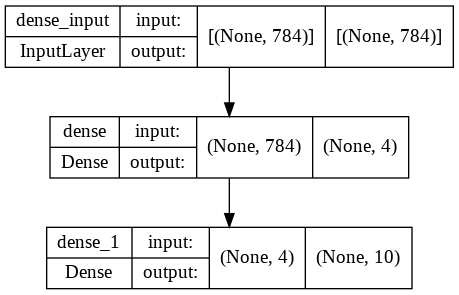

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

총 784개의 input node( 28*28의 input shape를 설정) , Hidden Layer 1개의 노드를 4로 설정하였으며

Output Layer의 ndoe를 10개(Class의 수)의 output node로 설정하였다.

설정한대로 Hidden Layer가 형성되었다.

In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[ 3.4646243e-02, -3.4223104e-01,  3.1089112e-03,  5.8895230e-01],
        [ 2.5419849e-01, -6.7170411e-01, -5.8623370e-02, -6.1308658e-01],
        [-2.3736638e-01,  9.9944299e-01, -9.6214160e-02, -1.5981847e+00],
        ...,
        [ 2.3919111e-01,  9.5889211e-02,  5.1835380e-02, -3.4677142e-01],
        [-4.3273438e-04, -8.0890983e-01,  6.8381816e-02,  1.2528600e-01],
        [ 6.1399353e-01,  1.1044041e+00, -3.5188563e-02, -1.1905066e+00]],
       dtype=float32),
 array([-0.44333363,  0.43209207, -0.03396036,  0.87479943], dtype=float32),
 array([[-0.64867496,  0.44814393, -0.15824097,  0.08848085, -0.03016403,
         -0.7083767 , -0.35349503, -0.19448557, -0.7909759 ,  0.27040845],
        [ 0.44504267, -0.40714574,  0.54154485,  0.2103408 ,  0.43943164,
         -0.33753863,  0.50393605, -1.3675903 ,  0.40893605, -0.6552311 ],
        [-0.07582783,  0.01075776, -0.29734373,  0.5686145 , -0.29270062,
          0.42745394,  0.53606826, -0.40102184, -0.26114655,  0.268506

대표적으로 Hidden Layer(노드:4)->Output Layer(노드:10)인 경우

첫 노드의 Weight와 전체 Bias를 확인한다. 

Weight

[-0.64867496,  0.44814393, -0.15824097,  0.08848085, -0.03016403,
         -0.7083767 , -0.35349503, -0.19448557, -0.7909759 ,  0.27040845]

Bias

[ 2.7559092 ,  0.65813   , -1.1080577 ,  2.2160442 , -1.5176864 ,
         1.505944  ,  0.7324058 , -0.63534665, -1.2894763 , -2.59874   ]

순차적인 Weight와 Bias확인은 다음과 같다

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

0         1         2         3
0    0.034646 -0.342231  0.003109  0.588952
1    0.254198 -0.671704 -0.058623 -0.613087
2   -0.237366  0.999443 -0.096214 -1.598185
3   -1.624461 -0.591503  0.017078 -0.572531
4    0.375303 -2.456232  0.022611 -0.744426
..        ...       ...       ...       ...
779  1.074788  0.903968 -0.106800 -0.166731
780  0.919024  0.401852  0.000149 -0.175239
781  0.239191  0.095889  0.051835 -0.346771
782 -0.000433 -0.808910  0.068382  0.125286
783  0.613994  1.104404 -0.035189 -1.190507

[784 rows x 4 columns]

In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

0
0 -0.443334
1  0.432092
2 -0.033960
3  0.874799

In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

0         1         2         3         4         5         6  \
0 -0.648675  0.448144 -0.158241  0.088481 -0.030164 -0.708377 -0.353495   
1  0.445043 -0.407146  0.541545  0.210341  0.439432 -0.337539  0.503936   
2 -0.075828  0.010758 -0.297344  0.568614 -0.292701  0.427454  0.536068   
3 -1.071692 -1.245651 -1.057943 -1.225765 -0.672189  0.487095 -0.663139   

          7         8         9  
0 -0.194486 -0.790976  0.270408  
1 -1.367590  0.408936 -0.655231  
2 -0.401022 -0.261147  0.268507  
3  0.653743  0.085099  0.309317

In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

0
0  2.755909
1  0.658130
2 -1.108058
3  2.216044
4 -1.517686
5  1.505944
6  0.732406
7 -0.635347
8 -1.289476
9 -2.598740

In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

loss,accuracy, val_loss, val_accuracy가 Epoch가 진행됨에 따라 어떻게 변하는지 확인한다.

 Ir(학습률=0.1로 고정)

In [ ]:
cls_history.history

{'accuracy': [0.36402082443237305,
  0.5712916851043701,
  0.6577083468437195,
  0.7056875228881836,
  0.726729154586792,
  0.7306249737739563,
  0.7442916631698608,
  0.7510416507720947,
  0.7523124814033508,
  0.7561874985694885,
  0.757562518119812,
  0.7611666917800903,
  0.7594583630561829,
  0.7619374990463257,
  0.7680208086967468,
  0.7667083144187927,
  0.7683749794960022,
  0.7667083144187927,
  0.7688958048820496,
  0.7702500224113464,
  0.7701666951179504,
  0.7722499966621399,
  0.7689791917800903,
  0.7721874713897705,
  0.7740416526794434,
  0.7726041674613953,
  0.7756666541099548,
  0.7762083411216736,
  0.7763749957084656,
  0.7749791741371155,
  0.7761666774749756],
 'loss': [1.6968315839767456,
  1.1594346761703491,
  0.9412245154380798,
  0.8452410697937012,
  0.7905603051185608,
  0.7682528495788574,
  0.732276439666748,
  0.7214241623878479,
  0.7119839787483215,
  0.7022927403450012,
  0.6972020864486694,
  0.687092125415802,
  0.6839289665222168,
  0.6829684972

accuracy는 epoch가 진행됨에 따라 계속 증가하지만, loss는 epcoh가 진행됨에 따라 계속 감소하지만

val_accuracy와 val_loss는 일정 Epoch이후 지속적으로 감소하거나 증가한다고 볼 수 없었다.

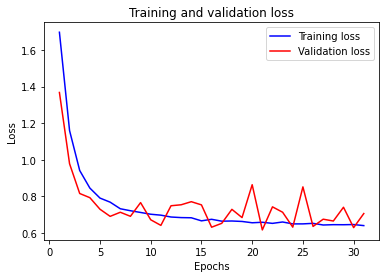

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tranning Loss는 지속적으로 감소하고 Validation Loss는 증가와 감소를 반복하고 있다. Epoch는 5 이후 그 차이가 조금씩 생기고 있기 때문에 적합한 모델이라고는 보기 힘들다

Validation Loss의 경우 Epoch=21에서 가장 작은 값을 보이고, 이때 Training Loss와 

가장 비슷할 것으로 에상된다.

Validation Loss로 Epcoh를 판단할 경우 Epoch=21이 된다.

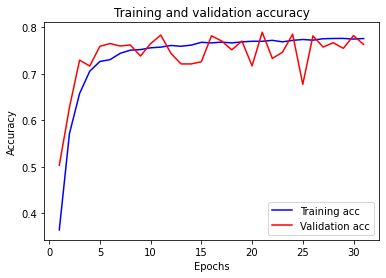

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Tranning Accuracy는 지속적으로 증가하고 Validation Accuracy는 증가와 감소를 반복하고 있다. Epoch는 5 이후 그 차이가 조금씩 생기고 있기 때문에 적합한 모델이라고는 보기 힘들다
Training accuracy는 지속적으로 증가하며

Valdation accuracy는 Epoch가 21일때 0.7879로 최댓값을 갖고 

이 때 Training Accuracy와 가장 비슷할 것으로 예상된다.


Validation accuracy와 Validation Loss로 Epcoh를 판단할 경우 Epoch=21이 된다.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.7860
test loss: 0.6364222168922424
test_accuracy: 0.7860000133514404


Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있다. 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그다음 층에서 이를 복원할 방법이 없다. 각 층은 잠재적으로 정보의 병목이 될 수 있다. 마지막에서 10개의 클래스로 구분을 하므로 중간에 4개 차원 공간은 10개의 클래스를 구분하기에 너무 제약이 많다. 이렇게 규모가 작은 층은 유용한 정보를 완전히 잃게 되는 정보의 병목 지침처럼 동작할 수 있다. 
출처: 케라스 창시자에게 배우는 딥러닝

검증 정확도가 0.786로 베이스 모델 0.8554에 비해서 0.0694 감소하였다. 이런 손실의 원인 대부분은 많은 정보 (클래스 10개의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문이다. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨넣었지만 전부 넣기에는 한계가 있었다. 

## Model2:hidden layer 10개 (노드: 각 32개), lr:0.01, batch size:1024, epoch: 300 (early stopping 44), optimizer: RMSprop

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(32, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=0.01),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/300
47/47 [==============================] - 4s 17ms/step - loss: 1.9666 - accuracy: 0.1949 - val_loss: 1.8184 - val_accuracy: 0.2415 - lr: 0.0100
Epoch 2/300
47/47 [==============================] - 1s 11ms/step - loss: 1.5020 - accuracy: 0.3475 - val_loss: 1.4419 - val_accuracy: 0.4478 - lr: 0.0100
Epoch 3/300
47/47 [==============================] - 1s 11ms/step - loss: 1.2195 - accuracy: 0.4894 - val_loss: 1.0387 - val_accuracy: 0.5349 - lr: 0.0100
Epoch 4/300
47/47 [==============================] - 1s 11ms/step - loss: 1.0368 - accuracy: 0.5532 - val_loss: 1.1924 - val_accuracy: 0.5093 - lr: 0.0100
Epoch 5/300
47/47 [==============================] - 0s 10ms/step - loss: 0.9239 - accuracy: 0.6210 - val_loss: 1.0035 - val_accuracy: 0.5906 - lr: 0.0100
Epoch 6/300
47/47 [==============================] - 1s 11ms/step - loss: 0.7485 - accuracy: 0.6955 - val_loss: 0.7492 - val_accuracy: 0.7022 - lr: 0.0100
Epoch 7/300
47/47 [==============================] - 1s 11ms/step - lo

Early Stopping Model을 사용하였기 때문에 
Epcoh 34에서 val_loss가 0.3940으로 최소가 된후 10번의 추가 Epoch에서 



Val_loss의 최솟값이 더이상 감소하지 않았다. 따라서 모델을 조기 종료하고 epoch 34 일때가 최적 Epoch임을 확인하였다.

최적 Epoch일때  loss =0.3868 ,accuracy= 0.8587 ,val_loss=0.3940,val_accuracy=0.861임을 알 수 있었다.

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1

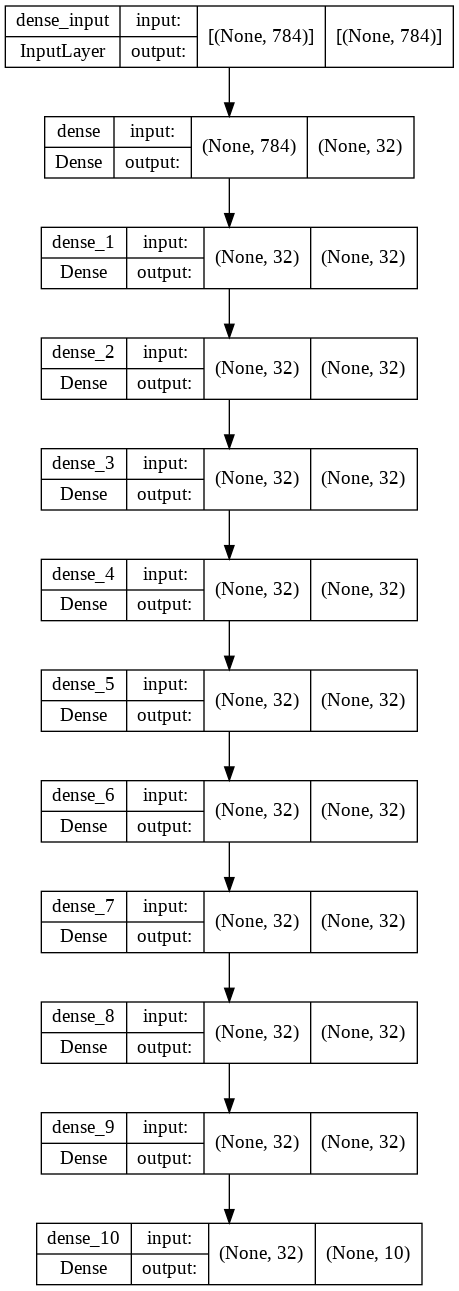

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

총 784개의 input node( 28*28의 input shape를 설정) , Hidden Layer 10개의 노드를 모두 32로 설정하였으며,

Output Layer의 ndoe를 10개(Class의 수)의 output node로 설정하였다.

설정한대로 Hidden Layer가 형성되었다.


In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[ 3.45280051e-01,  8.21538568e-02,  3.05510312e-03, ...,
         -3.12545970e-02, -2.71583572e-02, -4.41185348e-02],
        [ 6.17817938e-01, -4.51903753e-02, -2.56400034e-02, ...,
          6.83858469e-02,  1.08254433e-01, -4.45013493e-03],
        [ 1.79507637e+00,  1.28702074e-02, -3.09839435e-02, ...,
          6.13579415e-02, -1.67046177e+00,  9.04745534e-02],
        ...,
        [ 1.60016447e-01, -5.17281666e-02, -4.51531373e-02, ...,
          1.39970407e-02, -6.13131046e-01, -1.04522564e-01],
        [ 9.83115315e-01,  1.28543470e-02,  3.46043967e-02, ...,
         -3.17440629e-02, -4.83665913e-01, -1.13119975e-01],
        [ 1.21424437e+00, -1.83580443e-02,  9.29894447e-02, ...,
         -1.05073303e-03, -9.19908464e-01,  8.10114667e-02]], dtype=float32),
 array([ 3.8915330e-01, -2.5038432e-02, -1.3810169e-02,  6.4715755e-01,
         1.6478394e-01, -3.9575571e-01, -1.8369512e-01,  8.9985095e-02,
         4.8361629e-01, -3.1613383e-02,  4.8792893e-01, -2.0255156e-02

대표적으로 Hidden Layer(노드:32)->Output Layer(노드:10)인 경우

첫 노드의 Weight와 전체 Bias를 확인한다. 

Weight 

[ 1.54649720e-01, -1.33001685e+00,  7.01375008e-02,
         -1.25418258e+00,  3.34817842e-02, -1.02192307e+00,
          3.86791602e-02, -1.39711237e+00,  1.26286313e-01,
         -8.72862935e-01]

Bias

[-0.10877426, -0.18719856, -0.078435  ,  0.2828225 , -0.52564114,
        -0.1268687 ,  0.11051341,  0.01371191, -0.18769835, -0.23171699]


순차적인 Weight와 Bias확인은 다음과 같다

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

0         1         2         3         4         5         6   \
0    0.345280  0.082154  0.003055  0.470445 -0.066365 -0.277686 -0.549440   
1    0.617818 -0.045190 -0.025640  0.610124  0.215650 -0.412500 -0.680508   
2    1.795076  0.012870 -0.030984  0.414948  0.114202 -0.382191  0.013233   
3    0.550580 -0.007544 -0.079938 -0.537433  0.492659 -0.803710 -0.250031   
4   -1.068740  0.001101 -0.110562  0.823614  0.631245 -0.199450 -1.043573   
..        ...       ...       ...       ...       ...       ...       ...   
779 -0.298861  0.065774  0.056672  0.276764 -1.192529  0.370229  0.630393   
780 -0.016320 -0.027335  0.025649 -0.344813 -1.134012  0.415751  1.113674   
781  0.160016 -0.051728 -0.045153 -0.928644 -0.571970 -0.070695  0.769312   
782  0.983115  0.012854  0.034604 -0.289892 -0.287572 -0.018239 -0.113550   
783  1.214244 -0.018358  0.092989  0.314735 -0.517515 -0.856883  0.225626   

           7         8         9   ...        22        23        24  \
0    0.201331 -0.005277 -0.063100  ...  0.103836  0.083928  0.042354   
1   -0.223965  0.153059  0.006361  ... -0.353065  0.909566 -0.049491   
2   -0.809062  0.225906 -0.007280  ... -0.057120  0.809221 -0.007682   
3    0.354725  0.525490  0.027041  ... -0.587817  0.185016  0.110202   
4   -0.636468  0.623347 -0.061653  ... -0.866150 -0.166277 -0.047471   
..        ...       ...       ...  ...       ...       ...       ...   
779 -0.895643 -0.072630 -0.069174  ...  0.382245  0.115144 -0.107518   
780 -1.268397 -0.070007 -0.031100  ...  0.534855  0.551691 -0.067028   
781 -1.141888  0.573838 -0.060766  ... -0.029782  0.708345  0.013111   
782 -1.582264  0.507889  0.002904  ...  0.472661  1.147119 -0.025942   
783 -1.711351 -0.368439  0.032351  ...  0.699537  1.535677  0.036588   

           25        26        27        28        29        30        31  
0   -0.002460  0.130042  0.035498 -0.021526 -0.031255 -0.027158 -0.044119  
1    0.032220  0.206515  0.764253 -0.007887  0.068386  0.108254 -0.004450  
2    0.076051 -0.632453  0.623625 -0.026677  0.061358 -1.670462  0.090475  
3   -0.048237 -0.411128  0.300228  0.065667 -0.003497 -1.188127 -0.040900  
4    0.037365  1.384232  0.186558 -0.051540 -0.063393 -0.610534 -0.004259  
..        ...       ...       ...       ...       ...       ...       ...  
779 -0.020912 -0.248146 -0.090441  0.093557  0.048489 -0.271000  0.044754  
780 -0.028665  0.005587  0.013822  0.038129 -0.021157 -0.850864 -0.100269  
781  0.030514  0.890384 -0.521926  0.046368  0.013997 -0.613131 -0.104523  
782  0.001793  0.837240  0.243239  0.085372 -0.031744 -0.483666 -0.113120  
783  0.006789  0.213858  1.542767 -0.100249 -0.001051 -0.919908  0.081011  

[784 rows x 32 columns]

In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

0
0   0.389153
1  -0.025038
2  -0.013810
3   0.647158
4   0.164784
5  -0.395756
6  -0.183695
7   0.089985
8   0.483616
9  -0.031613
10  0.487929
11 -0.020255
12 -0.031615
13 -0.063034
14 -0.031582
15  0.302327
16 -0.019986
17 -0.060015
18 -0.031614
19 -0.049273
20  0.371395
21 -0.031581
22  0.696126
23 -0.095867
24 -0.052749
25 -0.030436
26 -0.013094
27 -0.983489
28 -0.062031
29 -0.031600
30 -0.526636
31  0.000258

In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

0         1         2         3         4         5         6   \
0  -0.313577 -1.618476 -1.303841  0.376261 -0.805862 -0.391821  0.509516   
1  -0.352710 -0.185074 -0.184543  0.241307  0.027104  0.228366 -0.068946   
2   0.251346 -0.093414  0.039989 -0.107872 -0.004711  0.106413  0.033871   
3  -0.794916 -1.314436 -0.548294 -0.354210 -0.541240 -0.154187  0.085810   
4  -0.250552 -0.533637  0.002193 -0.000448 -0.119715  0.104412 -0.350583   
5   0.475354 -0.666642 -0.254570 -0.032835  0.387734 -0.157483 -0.812336   
6  -0.166034 -0.316336  0.008706 -0.440681 -0.229995 -0.456759 -0.318755   
7  -0.168561 -0.655563 -0.500782  0.090975 -0.839110  0.520717  0.462218   
8  -0.441500 -0.603514 -0.399774  0.881398  0.734423  0.742968  0.585790   
9  -0.241848 -0.102815  0.085625  0.073556  0.288536 -0.217385  0.034524   
10  0.014686 -0.656664  0.316174  0.491924  0.191005  0.159846 -0.188397   
11 -0.208794 -0.219356 -0.267936 -0.267797  0.012091  0.092841  0.229922   
12  0.139430 -0.329886  0.230596 -0.068339  0.198515 -0.066746  0.154068   
13  0.312945 -0.053853 -0.184373 -0.150802  0.192186 -0.054890  0.007279   
14  0.109732 -0.189625 -0.050951  0.055695  0.054576 -0.175726  0.226423   
15  0.221582 -0.174040  0.678911  0.417756  0.064923  0.215419  0.649801   
16  0.277998 -0.131168  0.281042  0.051667  0.098053  0.250966  0.150209   
17  0.087708 -0.075479  0.166393 -0.181650 -0.007941 -0.015598 -0.262965   
18  0.046152 -0.201987 -0.185818 -0.256284 -0.186531  0.082172  0.224434   
19  0.157398 -0.276710 -0.187921  0.215142  0.000064 -0.264231 -0.003408   
20  0.033856  0.005386 -1.111727  0.007462  0.586482 -0.590199 -0.926744   
21 -0.138053  0.107361 -0.121111 -0.089653 -0.122925 -0.255718  0.112892   
22  0.093672 -1.546203  0.320235 -0.356679 -0.218023  0.432339  0.094902   
23 -0.796910  0.171588 -0.417366  0.691682  0.284720  0.321877 -0.534030   
24 -0.289738 -0.343505  0.326093 -0.262961 -0.151791  0.024123  0.130474   
25 -0.344519  0.150895  0.092330  0.214815  0.264541 -0.150123  0.219210   
26  0.037740  0.017289 -0.176108 -0.102464  0.354723 -0.023175 -0.420581   
27 -0.543733  0.246947 -0.176542 -0.576684  0.201007  0.354578  0.577308   
28 -0.089428 -0.098576  0.146017 -0.232327 -0.162446  0.267265  0.274455   
29 -0.032894 -0.017252  0.240524  0.078874 -0.137773  0.205472  0.091908   
30 -0.473060  0.372902 -0.958654 -0.267326 -0.188199 -0.259101 -0.086573   
31  0.273295 -0.199192  0.065448  0.072473 -0.016315 -0.055453 -0.272200   

          7         8         9   ...        22        23        24        25  \
0   0.221129  0.536239  0.157142  ... -0.378480 -0.382231 -0.213299 -1.487920   
1   0.129649  0.184088 -0.248548  ... -0.252091 -0.225412  0.168659  0.138267   
2  -0.053936  0.112717  0.101080  ... -0.093774 -0.078365 -0.036820  0.332764   
3  -0.811400 -0.645481  0.487302  ... -0.198044 -0.794395 -0.758020 -1.001498   
4   0.589360 -0.121871 -1.005468  ...  0.410996  0.170917 -0.445742 -0.744375   
5  -0.005377 -0.191451  0.126090  ...  0.325245 -0.137595 -0.834130 -0.185584   
6  -0.992938 -0.712671 -0.296604  ... -0.198070  0.185974  0.153908 -0.232093   
7   0.227091 -0.662039 -0.224786  ...  0.469913 -0.407459 -0.460640 -0.821020   
8  -0.468955  0.762041 -0.485976  ... -0.441236 -0.029856  0.640754 -1.125212   
9   0.052432 -0.040439 -0.094331  ...  0.147365 -0.155825 -0.171611 -0.127974   
10 -0.518774  0.822849  0.193874  ...  0.734242  0.293878  0.565939 -0.563663   
11 -0.200232 -0.219577  0.145942  ... -0.062389 -0.018139 -0.303080 -0.405827   
12  0.254754 -0.153247  0.130324  ... -0.022266 -0.249547  0.329388  0.199375   
13  0.181683  0.235827  0.203317  ...  0.119827  0.149438 -0.020316  0.133885   
14 -0.264897 -0.098103  0.012348  ...  0.044275 -0.064710  0.137902  0.136697   
15  0.066065 -0.283897 -0.127126  ... -0.384209  0.384462  0.663844 -0.735588   
16 -0.097103  0.164904 -0.029734  ... -0.008407 -0.040524 -0.175637 -0.204388   
17  0.015163  0.135774 -0.090191  ...  0.15

In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

0
0   0.355463
1  -0.770840
2   0.893697
3   0.272579
4  -0.320080
5   0.258906
6   0.522225
7   0.263633
8   0.144896
9   0.091156
10  0.204936
11  0.138507
12  0.367543
13  0.711022
14 -0.625086
15  0.039690
16 -0.608926
17 -0.197621
18 -0.159240
19 -0.354387
20  0.097976
21 -0.165940
22  0.206261
23  0.090454
24  0.402399
25 -0.937044
26  0.513883
27 -0.315942
28  0.184847
29  0.207416
30  0.051579
31 -0.389711

In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
cls_history.history

{'accuracy': [0.19493749737739563,
  0.3474999964237213,
  0.4893541634082794,
  0.5532291531562805,
  0.6209791898727417,
  0.6955000162124634,
  0.7101458311080933,
  0.7179583311080933,
  0.7324166893959045,
  0.7398750185966492,
  0.7537083625793457,
  0.7700208425521851,
  0.7774375081062317,
  0.7966458201408386,
  0.8102916479110718,
  0.8183749914169312,
  0.8297500014305115,
  0.828000009059906,
  0.8332083225250244,
  0.838854193687439,
  0.8394583463668823,
  0.8419166803359985,
  0.8442500233650208,
  0.847083330154419,
  0.8496458530426025,
  0.8506666421890259,
  0.8535000085830688,
  0.8526041507720947,
  0.8582708239555359,
  0.8591041564941406,
  0.859416663646698,
  0.8593124747276306,
  0.8555625081062317,
  0.8587499856948853,
  0.8581041693687439,
  0.8636458516120911,
  0.8605416417121887,
  0.8617916703224182,
  0.8650833368301392,
  0.8665624856948853,
  0.8663750290870667,
  0.8630833625793457,
  0.8686249852180481,
  0.8685833215713501],
 'loss': [1.9665635824

accuracy는 epoch가 진행됨에 따라 계속 증가하지만, loss는 epcoh가 진행됨에 따라 계속 감소하지만

val_accuracy와 val_loss는 일정 Epoch이후 지속적으로 감소하거나 증가한다고 볼 수 없었다.

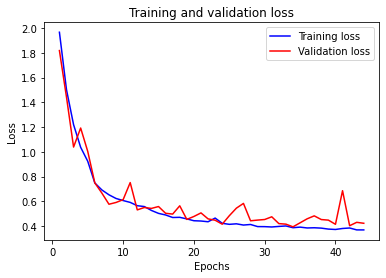

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tranning Loss는 지속적으로 감소하고 Validation Loss는 증가와 감소를 반복하고 있다. Epoch는 10 이후 그 차이가 조금씩 생기고 있기 때문에 적합한 모델이라고는 보기 힘들다

Validation Loss의 경우 Epoch=34에서 가장 작은 값을 보이고, 이때 Training Loss와 

가장 비슷할 것으로 에상된다.

Validation Loss로 Epcoh를 판단할 경우 Epoch=34가 된다.


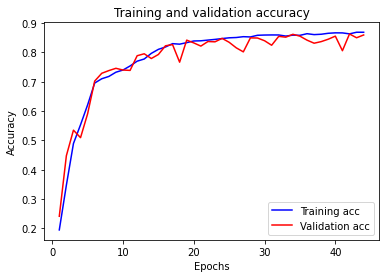

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Tranning Accuracy는 지속적으로 증가하고 Validation Accuracy는 증가와 감소를 반복하고 있다. Epoch는 15 이후 그 차이가 조금씩 생기고 있기 때문에 적합한 모델이라고는 보기 힘들다
Training accuracy는 지속적으로 증가하며

Valdation accuracy는 Epoch가 42일때 0.8627최댓값을 갖고

이 때 Training Accuracy와 가장 비슷할 것으로 예상된다.

Validation accuracy로 Epoch결정시 Epoch=42   또는 

반복횟수가 크다고 생각하여 줄이고 싶다면Epoch=34 이다.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8549
test loss: 0.41187167167663574
test_accuracy: 0.8549000024795532


https://ynebula.tistory.com/36

베이스모델의 정확도 0.8554에 비해 0.8549로 정확도가 0.0005로 낮게 나왔다. 이는 큰차이는 아니지만 은닉층이 늘어나면 더 좋은 성능을 발휘할것이라는 상식에서 벗어난다. 은닉층을 추가하거나 은닉층의 노드를 늘려 역전파 알고리즘으로 학습시키면 오히려 성능이 저하되는 경우가 많다. 이는 신경망의 계층을 깊게 만들면 성능이 오히려 떨어지는데 신경망이 그래디언트 손실, 과적합, 많은 계산량으로 제대로 학습되지 않기 때문이다. 

그래디언트 소실: 역전파 알고리즘은 출력층의 오차를 역전파 시켜 신경망을 학습시키는데 이러한 과정에서 출력층에서 멀어질수록 신경망의 출력 오차가 반영되지 않는 현상을 말한다. 

이를 극복하기위해 활성함수를 sigmoid에서 relu로 변경했다. relu는 sigmoid보다 오차가 훨씬 더 잘 전달된다. 베이스 모델과 model2 모두 relu를 사용해주었기 때문에 차이가 0.0005로 작게 나왔다.

과적합: 심층 신경망은 과적합 문제에 취약하다. 그 이유는 은닉층이 늘어 연결 가중치가 많아져 복잡한 모델이 되기 때문이다. 이를 극복하기 위해 드롭아웃을 사용한다. 

이를 극복하기위해 드랍아웃은 신경망 노드 중 무작위로 일부 비활성화 시켜 연산에서 제외하여 신경망이 과적합에 빠지는 것을 예방한다. (일반적으로 은닉층 50%, 입력노드 25%)정규화는 모델을 단순하게 만들어 과적합을 예방한다. 많은 학습데이터를 사용하면 신경망이 특정 데이터에 의해 편향될 여지가 줄어들어 과적합을 방지할 수 있다. 

많은 계산량: 은닉층이 많으면 가중치가 기하급수적으로 늘어나고 학습데이터도 많이 필요해 계산량이 급증한다. 실제로 베이스 모델을 학습시켰을때 42에서 early stopping 했지만 model2는 44가 걸렸다.하지만 이 역시 GPU와 같은 고성능 하드웨어와 배치 정규화로 그 차이를 극복해 내어 베이스 모델과 model2가 그 차이가 크지 않은 것을 확인할 수 있다.  



# Learning Rate

-  gradient의 방향으로 얼마나 빠르게 이동할 것인지 결정하는 변수
- 가중치 업데이트 시 한 스텝을 가는 보폭

기본값 .01

너무 높은 경우, 발산

너무 낮은 경우, 학습속도 느리며 최저점 찾는데 실패할 수 있음

optimizer 내부 옵션으로 사용

경사하강법 알고리즘은 기울기에 학습률 또는 보폭이라 불리는 스칼라를 곱해 다음 지점을 결정, Local minimum에 효율적으로 도달할 수 있도록, 너무 크지도 작지도 않은 적절한 학습률을 세팅해야 함

https://bioinformaticsandme.tistory.com/130

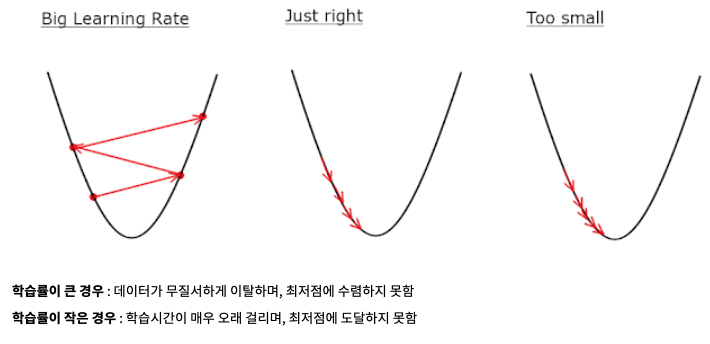

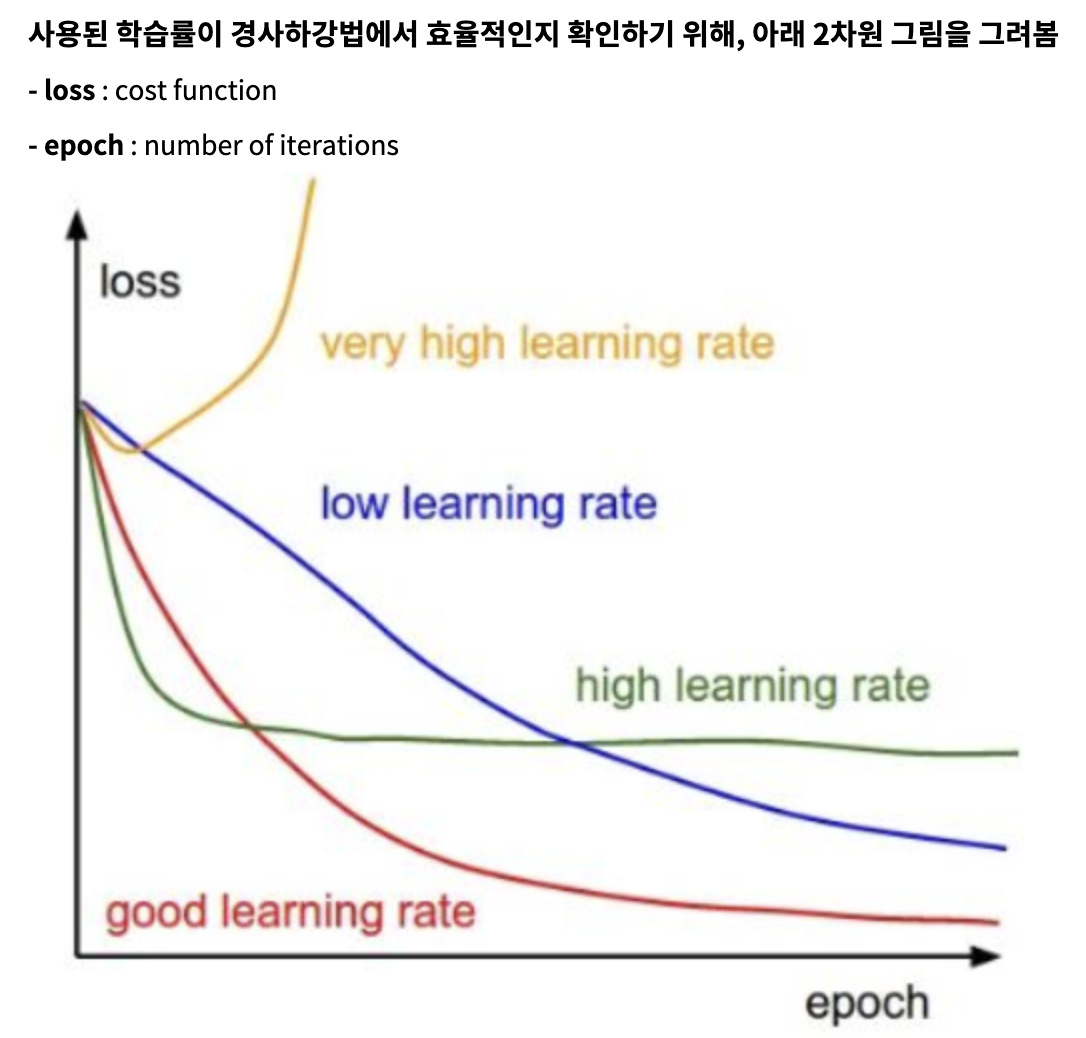

## Model3: hidden layer 2개 (노드: 각 32개, 8개), lr:0.0001, batch size:1024, epoch: 300, optimizer: RMSprop

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=0.0001),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/300
47/47 [==============================] - 3s 10ms/step - loss: 2.0362 - accuracy: 0.2699 - val_loss: 1.8625 - val_accuracy: 0.3487 - lr: 1.0000e-04
Epoch 2/300
47/47 [==============================] - 0s 6ms/step - loss: 1.7588 - accuracy: 0.3709 - val_loss: 1.6623 - val_accuracy: 0.3952 - lr: 1.0000e-04
Epoch 3/300
47/47 [==============================] - 0s 6ms/step - loss: 1.5962 - accuracy: 0.4021 - val_loss: 1.5261 - val_accuracy: 0.4319 - lr: 1.0000e-04
Epoch 4/300
47/47 [==============================] - 0s 6ms/step - loss: 1.4815 - accuracy: 0.4520 - val_loss: 1.4277 - val_accuracy: 0.4949 - lr: 1.0000e-04
Epoch 5/300
47/47 [==============================] - 0s 6ms/step - loss: 1.3966 - accuracy: 0.5097 - val_loss: 1.3526 - val_accuracy: 0.5418 - lr: 1.0000e-04
Epoch 6/300
47/47 [==============================] - 0s 6ms/step - loss: 1.3275 - accuracy: 0.5500 - val_loss: 1.2902 - val_accuracy: 0.5718 - lr: 1.0000e-04
Epoch 7/300
47/47 [==============================] 

학습률을 0.00001로 한 결과 Early Stopping은 발생하지 않았고 

val_loss가 지속적으로 감소, 설정한 Epoch가 300회 모두를 돌리게 되었다

Epoch=300일때 loss=0.3165 , accuracy: 0.8878 ,val_loss= 0.3701, val_accuracy= 0.0.8691 임을 알 수 있었다.

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


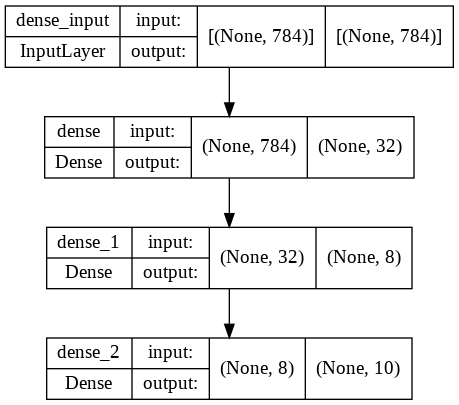

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

총 784개의 input node( 28*28의 input shape를 설정) , Hidden Layer의 노드를 각각 32,8로 설정하였으며,

Output Layer의 ndoe를 10개(Class의 수)의 output node로 설정하였다.

설정한대로 Hidden Layer가 형성되었다.

In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.2184562 ,  0.15021168,  0.0029796 , ...,  0.08106083,
         -0.12769291, -0.00404478],
        [ 0.13016045, -0.11466753,  0.03107966, ...,  0.07099663,
          0.02455426, -0.02709091],
        [ 0.10317719, -0.13740323,  0.06582451, ...,  0.08350307,
         -0.18186486, -0.06442726],
        ...,
        [ 0.1207465 , -0.07998789,  0.12294612, ...,  0.12214077,
         -0.06276828, -0.02821014],
        [ 0.05363638, -0.06990297,  0.17424124, ..., -0.0658896 ,
          0.13251056, -0.2462234 ],
        [ 0.09244246, -0.13162704,  0.22460693, ...,  0.16186008,
         -0.01644079,  0.01372614]], dtype=float32),
 array([ 0.00235428,  0.23167877, -0.10123979,  0.08516461,  0.30520234,
         0.0041565 ,  0.07991641,  0.04638881,  0.09969039, -0.05056047,
        -0.18338127,  0.08119141, -0.03121333,  0.19223906,  0.5200974 ,
         0.34828526,  0.2984882 , -0.01290146,  0.2526507 ,  0.14263794,
        -0.07942689,  0.14888905, -0.15672146,  0.0276471 , -0.136

대표적으로 Hidden Layer(노드:8)->Output Layer(노드:10)인 경우

첫 노드의 Weight와 전체 Bias를 확인한다

Weight

[-0.13582823,  0.69781977, -0.20815457,  0.10849772,  0.333985  ,
         -0.4857394 , -0.8167339 , -0.2285833 , -0.01535825, -0.8063747 ]

Bias

[ 0.12243793, -0.02084873, -0.15732706,  0.480398  , -0.20715725,
         0.66445565,  0.2186744 , -0.10418327, -0.687663  , -0.71342254]
. 

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

0         1         2         3         4         5         6   \
0   -0.218456  0.150212  0.002980  0.143106 -0.128094  0.087605  0.073373   
1    0.130160 -0.114668  0.031080 -0.093277  0.104302  0.025741 -0.230334   
2    0.103177 -0.137403  0.065825 -0.215968  0.009789 -0.211516 -0.159325   
3   -0.096998 -0.065833  0.198462 -0.240488 -0.063428 -0.065559 -0.250403   
4   -0.239623 -0.159792  0.162318 -0.098822 -0.099425  0.124542  0.205978   
..        ...       ...       ...       ...       ...       ...       ...   
779  0.044626  0.049976  0.341821 -0.109434  0.185834  0.042937 -0.014710   
780  0.031016 -0.054564  0.371544 -0.044093  0.072043  0.020891  0.107401   
781  0.120747 -0.079988  0.122946 -0.305296  0.189876  0.002673  0.049073   
782  0.053636 -0.069903  0.174241 -0.126425  0.047745  0.209119  0.129623   
783  0.092442 -0.131627  0.224607 -0.281538  0.119700  0.132838 -0.016898   

           7         8         9   ...        22        23        24  \
0   -0.106377 -0.031322 -0.200492  ...  0.022683 -0.005452  0.135427   
1    0.181688  0.027521  0.229651  ... -0.043212 -0.208747 -0.276387   
2    0.021599 -0.168767  0.140975  ...  0.193556 -0.328264 -0.197074   
3   -0.089659  0.018262  0.097699  ...  0.026403 -0.269843  0.069779   
4   -0.142704  0.026261 -0.106333  ...  0.195739 -0.307900  0.216096   
..        ...       ...       ...  ...       ...       ...       ...   
779  0.177371 -0.157773  0.123265  ...  0.102102  0.149365 -0.149043   
780  0.082312 -0.252709 -0.007821  ...  0.119767  0.098768 -0.063126   
781  0.088043 -0.051476 -0.003411  ... -0.019827  0.145370 -0.083173   
782  0.132947 -0.011962  0.086422  ...  0.248034 -0.066703  0.085722   
783  0.106070 -0.072683  0.022439  ...  0.043278  0.061267  0.026877   

           25        26        27        28        29        30        31  
0    0.028075 -0.123731  0.197811 -0.144686  0.081061 -0.127693 -0.004045  
1   -0.018940  0.267895 -0.170068 -0.044771  0.070997  0.024554 -0.027091  
2   -0.065763  0.054510 -0.076909 -0.283588  0.083503 -0.181865 -0.064427  
3    0.155070  0.075013  0.082446  0.098139 -0.119069 -0.166794  0.003679  
4   -0.052334 -0.374721  0.005219 -0.086336 -0.245035 -0.111573  0.012717  
..        ...       ...       ...       ...       ...       ...       ...  
779 -0.104615  0.102866 -0.143174  0.075806 -0.003876  0.208418 -0.100969  
780 -0.001080  0.069663 -0.055868 -0.134109  0.038571  0.134468 -0.174390  
781 -0.004382  0.105186 -0.219639 -0.164408  0.122141 -0.062768 -0.028210  
782 -0.256815 -0.162547 -0.067391 -0.061005 -0.065890  0.132511 -0.246223  
783 -0.122369  0.026742  0.018006 -0.293271  0.161860 -0.016441  0.013726  

[784 rows x 32 columns]

In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

0
0   0.002354
1   0.231679
2  -0.101240
3   0.085165
4   0.305202
5   0.004156
6   0.079916
7   0.046389
8   0.099690
9  -0.050560
10 -0.183381
11  0.081191
12 -0.031213
13  0.192239
14  0.520097
15  0.348285
16  0.298488
17 -0.012901
18  0.252651
19  0.142638
20 -0.079427
21  0.148889
22 -0.156721
23  0.027647
24 -0.136758
25  0.191140
26  0.150295
27  0.038729
28 -0.038105
29  0.211461
30 -0.184086
31  0.272156

In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

0         1         2         3         4         5         6  \
0  -0.221767  0.152253 -0.740848 -0.409105  0.282217 -0.308336  0.065842   
1   0.023175  0.343748 -0.022417 -0.072064  0.487142  0.411577  0.143532   
2  -0.291089 -0.177091  0.208355  0.328362 -0.544268  0.363120 -0.538121   
3  -0.246042  0.285097  0.621779 -0.401764 -0.168765  0.491322 -0.406176   
4  -0.501978  0.004064 -0.432027  0.536724 -0.173426  0.523976 -0.214612   
5   0.412692 -0.311909 -0.313352  0.371342 -0.120165  0.310449 -0.548805   
6   0.182857 -0.550339  0.300934 -0.003737  0.151700  0.037560 -0.198791   
7   0.613938  0.315210 -0.384392  0.376472 -0.216277 -0.554483 -0.367889   
8   0.452595 -0.145632  0.069838 -0.176095 -0.140148  0.218937  0.023038   
9   0.306757  0.151033 -0.268685  0.322833 -0.472246 -0.273251  0.488429   
10 -0.039130  0.033967  0.702973  0.371319  0.233686 -0.317186  0.252516   
11  0.059106  0.398131  0.302014  0.298572 -0.073461  0.104816  0.429617   
12  0.082370 -0.138650 -0.191208 -0.010341 -0.214754 -0.299140  0.622347   
13 -0.100940  0.419795  0.478604 -0.207298 -0.072477  0.337337 -0.036810   
14  0.045091  0.730642 -0.256858 -0.496248 -0.431807  0.744891 -0.160757   
15 -0.195867  0.488285 -0.004742  0.191490  0.424828  0.465568  0.439319   
16 -0.637755 -0.370534  0.342671  0.205313  0.833633 -0.047958  0.252182   
17 -0.148782 -0.334966  0.295098  0.172442 -0.050102 -0.299748 -0.243329   
18  0.299928  0.060167 -0.983457 -0.036058 -0.011887  0.165691 -0.027373   
19 -0.380448 -0.330215 -0.031310  0.183830  0.148663  0.243184  0.298874   
20  0.440586 -0.365356 -0.031113  0.161832  0.425375  0.008366 -0.295967   
21 -0.014939  0.360567  0.308401  0.059188 -0.371303 -0.106511  0.388565   
22  0.292781 -0.089814  0.383313  0.301868  0.168319 -0.183623  0.276827   
23 -0.292490  0.372545 -0.377046 -0.294579  0.606152 -0.165907 -0.167205   
24  0.074140 -0.344876  0.337044 -0.181244 -0.017748 -0.108386 -0.322148   
25 -0.420343  0.264245  0.075691 -0.609241 -0.458360  0.414691 -0.050014   
26 -0.186433  0.434672 -0.074752 -0.329150 -0.058728  0.204125 -0.246964   
27 -0.251264  0.157850  0.446272 -0.132488  0.178066  0.261241 -0.270389   
28  0.439777  0.158160  0.238141  0.438616 -0.490220  0.350684  0.183921   
29 -0.352506 -0.146619 -0.118741 -0.155200  0.175284  0.424715 -0.387762   
30  0.420555  0.328450 -0.176008  0.241667  0.411977 -0.404565  0.303288   
31  0.019700 -0.333729 -0.227323 -0.257607 -0.285298  0.567303  0.186185   

           7  
0   0.211457  
1  -0.180689  
2   0.552035  
3  -0.590819  
4   0.333237  
5  -0.322674  
6  -0.312853  
7   0.379440  
8   0.051131  
9   0.289295  
10 -0.181427  
11  0.136795  
12 -0.077028  
13  0.052129  
14 -0.624318  
15  0.113169  
16  0.536027  
17 -0.221849  
18  0.188778  
19  0.298099  
20  0.243208  
21  0.538572  
22  0.173027  
23 -0.036489  
24 -0.426303  
25 -0.114416  
26  0.741598  
27 -0.160541  
28 -0.006209  
29  0.332810  
30 -0.251048  
31  0.145839

In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

0
0 -0.033431
1  0.127222
2 -0.130688
3 -0.145361
4 -0.071350
5  0.292140
6  0.042386
7  0.158021

In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

loss,accuracy, val_loss, val_accuracy가 Epoch가 진행됨에 따라 어떻게 변하는지 확인한다.

 Ir(학습률=0.0001로 고정)

In [ ]:
cls_history.history

{'accuracy': [0.2699374854564667,
  0.3709166646003723,
  0.4020625054836273,
  0.4519583284854889,
  0.5097083449363708,
  0.5499791502952576,
  0.5753750205039978,
  0.5872916579246521,
  0.5954166650772095,
  0.6019999980926514,
  0.6092291474342346,
  0.6206874847412109,
  0.635937511920929,
  0.6480416655540466,
  0.6586458086967468,
  0.6667083501815796,
  0.6746249794960022,
  0.6809999942779541,
  0.6876875162124634,
  0.6923750042915344,
  0.6978124976158142,
  0.7025833129882812,
  0.7064999938011169,
  0.7096041440963745,
  0.7141249775886536,
  0.7167708277702332,
  0.7198958396911621,
  0.7223749756813049,
  0.7255625128746033,
  0.7279999852180481,
  0.7308124899864197,
  0.7327499985694885,
  0.7369791865348816,
  0.7442499995231628,
  0.7593125104904175,
  0.781208336353302,
  0.8011041879653931,
  0.8117499947547913,
  0.8189583420753479,
  0.8222083449363708,
  0.8241041898727417,
  0.8263750076293945,
  0.8282291889190674,
  0.8288333415985107,
  0.8301874995231628,


accuracy는 epoch가 진행됨에 따라 대부분의 경우  증가
loss는 epcoh가 진행됨에 따라 계속 감소하였다.

learnig rate를 0.001로 설정한결과
val_accuracy와 val_loss는 일정 Epoch이후 지속적으로 감소하거나 증가하였다

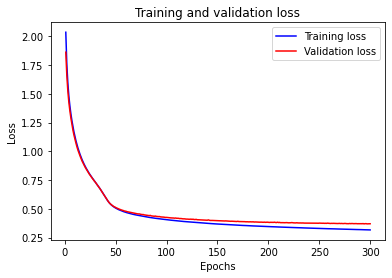

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

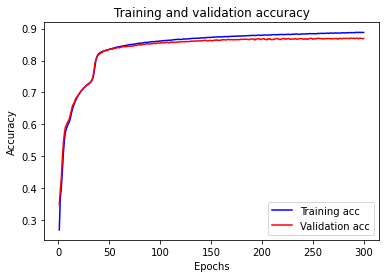

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

앞선 모델들과 다르게 Training 과 Valdaition Data의 loss,accuracy가 거의 일치함을 알 수 있었기 때문에 잘 구성된 모델이며

Early Stopping으로 최적 Epoch를 구하지 않고 초기 설정한

Epoch 300회를 모두 시행했을 때가 최적 Epoch였다.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8614
test loss: 0.3965766131877899
test_accuracy: 0.8614000082015991


Base Model 0.8554에 비해 0.8614로 정확도가 높게 나왔다. 하지만 학습시간 설정해주었던 epoch 300을 모두 사용해 주었는데도 early stopping에는 도달하지 못했을 정도로 학습시간이 오래 걸렸다. 이는 매우 섬세하게 학습을 하면서 정확도는 높게 나왔으나 시간이 오래 걸리것으로 만약 base model과 같은 epoch을 사용했다면 원하는 loss 최소점과 정확도에 도달하지 못했을 것이다. 

##Model4: hidden layer 2개 (노드: 각 32개, 8개), lr:0.5, batch size:1024, epoch: 300 (early stopping 42), optimizer: RMSprop

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=0.5),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/300
47/47 [==============================] - 5s 13ms/step - loss: 1052.5387 - accuracy: 0.1525 - val_loss: 2.4241 - val_accuracy: 0.2250 - lr: 0.5000
Epoch 2/300
47/47 [==============================] - 0s 8ms/step - loss: 2.3488 - accuracy: 0.2076 - val_loss: 2.2007 - val_accuracy: 0.1821 - lr: 0.5000
Epoch 3/300
47/47 [==============================] - 0s 8ms/step - loss: 2.3398 - accuracy: 0.1942 - val_loss: 2.2178 - val_accuracy: 0.1737 - lr: 0.5000
Epoch 4/300
47/47 [==============================] - 0s 8ms/step - loss: 1.9462 - accuracy: 0.1894 - val_loss: 1.7731 - val_accuracy: 0.1972 - lr: 0.5000
Epoch 5/300
47/47 [==============================] - 0s 7ms/step - loss: 1.8820 - accuracy: 0.1913 - val_loss: 1.8195 - val_accuracy: 0.1981 - lr: 0.5000
Epoch 6/300
47/47 [==============================] - 0s 8ms/step - loss: 2.0363 - accuracy: 0.1623 - val_loss: 2.3146 - val_accuracy: 0.1003 - lr: 0.5000
Epoch 7/300
47/47 [==============================] - 0s 8ms/step - loss:

Early Stopping Model을 사용하였기 때문에 
Epcoh 4에서 val_loss가 1.7731로 최소가 된후 10번의 추가 Epoch에서 

Val_loss의 최솟값이 더이상 감소하지 않았다. 따라서 모델을 조기 종료하고 epoch 4일때가 최적 Epoch임을 확인하였다.

최적 Epoch일때 loss= 1.9462, accuracy = 0.1894 , val_loss=1.7731, val_accuracy= 0.1972 임을 알 수 있었다.

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


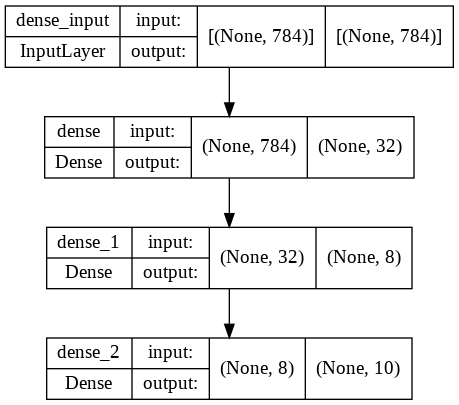

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

총 784개의 input node( 28*28의 input shape를 설정) , Hidden Layer의 노드를 각각 32,28로 설정하였으며,

Output Layer의 ndoe를 10개(Class의 수)의 output node로 설정하였다.

설정한대로 Hidden Layer가 형성되었다.

In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-1.315101  , -1.2042708 , -1.2579463 , ..., -1.3133389 ,
          0.01612532, -1.333163  ],
        [-1.2589667 , -1.9793847 , -2.5314324 , ..., -1.5371308 ,
         -1.572986  , -5.421784  ],
        [-1.6255437 ,  0.85324943, -3.1509197 , ..., -3.9936903 ,
         -0.05213046, -5.035467  ],
        ...,
        [-0.09567893,  0.11600824, -2.14549   , ..., -2.2643206 ,
         -0.02627432,  0.80689335],
        [-3.0585527 , -0.40039793, -2.3535066 , ..., -2.6273818 ,
         -3.1449137 ,  0.58436334],
        [-2.7928119 , -4.5440745 ,  0.46871006, ..., -1.9890785 ,
         -3.082189  , -2.1262963 ]], dtype=float32),
 array([-2.7493353e+00,  3.3421326e-01, -3.1788669e+00, -2.6127806e+00,
        -8.5175037e-04, -5.1563359e-03, -5.5150869e-03, -3.1620586e+00,
        -3.1985156e-03, -3.5750866e-04, -3.1621673e+00, -2.9860153e+00,
        -2.1576881e-04,  8.1662416e-02, -1.5811187e+00, -3.7067585e+00,
        -2.1712379e+00, -1.5810833e+00,  6.3240170e-01, -3.7199513e-03

대표적으로 Hidden Layer(노드:8)->Output Layer(노드:10)인 경우

첫 노드의 Weight와 전체 Bias를 확인한다.

Weight

[[-1.5705919 , -1.5558043 , -2.0257883 , -0.4478451 ,  0.47516263,
         -0.06869698, -2.17399   , -1.5736504 , -1.4703122 ,  0.9344137 ]

Bias

[3.7770028, 3.8484654, 4.0203   , 4.081161 , 4.211411 , 1.5560286,
        4.013507 , 1.0092334, 2.3624055, 1.6378034]

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

0         1         2         3         4         5         6   \
0   -1.315101 -1.204271 -1.257946 -1.223523 -0.078813  0.028279 -0.057609   
1   -1.258967 -1.979385 -2.531432 -1.585278  0.056956 -1.542536 -1.589474   
2   -1.625544  0.853249 -3.150920 -1.601030 -3.108226 -3.131907 -2.971629   
3   -0.579804  1.196845 -3.208883 -0.900790 -2.946730 -3.076449 -3.234778   
4   -3.095061 -2.121099 -3.539657 -1.522155 -3.057195 -3.105641 -3.189893   
..        ...       ...       ...       ...       ...       ...       ...   
779  0.036266  0.481972 -1.633166 -1.531815  0.073843 -3.242522 -0.046474   
780 -0.045508  0.264108 -4.826801 -0.402755 -0.025829 -3.180513 -3.092333   
781 -0.095679  0.116008 -2.145490  2.528477 -0.005974 -3.226058 -3.137347   
782 -3.058553 -0.400398 -2.353507 -1.229279 -0.073557 -3.241857 -3.070374   
783 -2.792812 -4.544075  0.468710 -0.264773  1.558591 -0.393794 -1.622178   

           7         8         9   ...        22        23        24  \
0   -0.043060 -0.013966 -0.063100  ... -0.001563  0.083928  0.042354   
1   -1.604111 -1.628363  0.006361  ... -1.640939 -0.084139 -1.622666   
2   -0.020293 -2.416746 -1.264318  ... -0.063473  0.144284 -3.153527   
3   -0.007755 -2.846888  0.168744  ... -3.043922  1.243798 -3.054477   
4    0.022922 -0.193956 -0.019482  ... -0.001905  0.733354 -3.182497   
..        ...       ...       ...  ...       ...       ...       ...   
779 -0.008716 -3.237165 -0.037732  ... -0.053202  0.014769 -3.237984   
780  0.042375 -3.211064 -0.147086  ...  0.018470 -0.000202 -3.197192   
781 -0.014053 -3.085199 -3.156842  ... -3.165269  3.117498 -3.179951   
782 -3.119617 -1.591164  1.541293  ... -3.043199  3.071189 -3.214077   
783 -1.471444 -1.588745  1.477206  ... -0.110731 -1.459879 -3.116868   

           25        26        27        28        29        30        31  
0   -0.002460 -0.081103  0.057048 -0.021526 -1.313339  0.016125 -1.333163  
1    0.041268 -1.529986 -1.526601 -0.007887 -1.537131 -1.572986 -5.421784  
2    1.493882  0.552462 -0.271403 -1.398959 -3.993690 -0.052130 -5.035467  
3    1.568672  0.052480  0.062551  1.525926 -0.729228  0.035673 -4.765825  
4   -1.484282 -0.142974 -3.120820 -1.384997 -4.685964  0.074833 -2.330587  
..        ...       ...       ...       ...       ...       ...       ...  
779 -1.538995 -1.066061 -3.112762 -1.526456 -1.625602  0.030592 -3.086119  
780 -1.547030 -1.900771 -3.134424 -1.558941 -1.818817  0.082623 -0.001995  
781 -1.532420 -2.281272 -0.082194 -1.537028 -2.264321 -0.026274  0.806893  
782  1.554568 -0.972925  0.038528 -1.488683 -2.627382 -3.144914  0.584363  
783 -1.508935  1.477213  0.027330 -1.590146 -1.989079 -3.082189 -2.126296  

[784 rows x 32 columns]

In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

0
0  -2.749335
1   0.334213
2  -3.178867
3  -2.612781
4  -0.000852
5  -0.005156
6  -0.005515
7  -3.162059
8  -0.003199
9  -0.000358
10 -3.162167
11 -2.986015
12 -0.000216
13  0.081662
14 -1.581119
15 -3.706758
16 -2.171238
17 -1.581083
18  0.632402
19 -0.003720
20 -3.162172
21 -3.224327
22 -0.003851
23 -3.120307
24 -0.204014
25 -1.580979
26 -2.201332
27 -3.161786
28 -1.581001
29  0.098853
30 -3.162235
31 -0.178984

In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

0         1         2         3         4         5         6  \
0  -1.792086 -1.555163 -3.282302 -1.144896 -1.394342  1.227846 -1.640641   
1  -1.574734 -1.273554 -3.154135 -3.229275 -0.443195  1.184290  0.062592   
2  -1.574630 -3.864254  1.813677 -3.096647 -1.606973  1.213680 -3.317740   
3  -1.740092 -1.299983 -2.806878 -1.612838 -1.719559  1.341173 -0.561589   
4  -1.967110 -1.726022 -0.311827  0.347711 -1.624085  0.288949 -0.088803   
5   1.873315 -2.146132 -0.290694 -2.934424 -1.622257  0.135988 -0.361504   
6   0.154104 -2.386218  0.106914 -3.145307 -1.505809  0.019478 -0.246228   
7  -1.327540 -3.012602 -0.188794  0.184724  1.491435 -0.344652 -0.153184   
8  -1.259364 -1.689719 -0.028844 -0.196002 -1.665548  0.134910  0.060615   
9   1.800637 -1.452623 -0.176948  0.256435  1.262420 -0.269561  0.343874   
10 -1.548965 -2.913649  0.288365 -2.939913 -1.533859 -0.048791 -0.034502   
11 -3.168092 -0.213774 -0.448184 -0.533359 -1.732707  1.162819 -2.844813   
12 -1.517218 -1.674054 -0.227471  0.008645  1.376838 -0.179756  0.171457   
13 -1.718806 -2.664452 -0.189806 -3.335640 -3.329683  0.621539 -3.188306   
14  0.849208 -1.297561  1.532107 -1.705615 -1.527988  1.548627 -1.701502   
15 -1.691395 -1.134122 -0.869913 -3.008274 -2.853601  1.142276 -2.909030   
16 -0.322343  1.885763 -2.803092 -2.839449 -1.232771  0.232095 -2.602325   
17 -1.725822  1.235194 -1.276896 -1.401380 -1.621653  1.273114 -1.811922   
18 -1.471911 -1.773162 -1.616508 -1.644532 -1.470217 -0.182366 -3.112807   
19 -1.917010 -3.352893 -0.063271  0.182522  1.613044  0.212826  0.200530   
20 -1.216134 -0.214684 -0.098709  0.052032  1.883901  3.143666 -3.459421   
21 -1.615840 -1.221711 -2.893753 -3.084455 -3.458939  0.896474 -2.900249   
22 -1.331650 -3.089073  0.264528  0.243907 -2.012752 -0.210087  0.177460   
23 -1.854173 -1.854209 -0.157256 -0.265228 -1.222030  2.976236 -0.268177   
24 -1.545906 -1.837313  0.177941 -0.238078 -1.634672  3.022529 -0.317578   
25 -1.877441 -1.439670  1.638089  1.231269  1.279480 -1.487787  1.540944   
26 -1.734210 -1.290755  1.808596  0.567149 -1.511993 -1.537012 -1.734434   
27 -1.821897 -1.417017  0.273067  1.414622  1.675277  3.315833 -0.274435   
28 -1.409641  1.540311 -1.399828 -1.245212  1.347327  1.925123 -1.327528   
29 -1.878033 -3.298636  1.605042 -1.477807 -0.087628 -0.052415 -3.437656   
30 -1.228799  0.280969 -0.153007  0.225887  1.863285  2.811347  0.191139   
31 -1.876942 -1.957525 -0.184601 -3.413983 -3.342182  0.882004 -2.936274   

           7  
0  -1.568612  
1  -1.721654  
2  -1.225561  
3  -1.928181  
4  -1.417045  
5   1.289816  
6  -1.773664  
7  -1.429773  
8  -1.570164  
9  -1.429574  
10 -1.600549  
11 -0.458093  
12 -1.643313  
13 -1.579760  
14 -1.887310  
15 -1.478899  
16  1.833663  
17 -1.807385  
18 -1.647397  
19 -1.317751  
20 -1.350844  
21 -1.272356  
22 -1.424953  
23 -1.623789  
24 -1.934285  
25 -1.750333  
26 -1.194990  
27 -1.688668  
28  1.615472  
29 -1.356523  
30 -1.749063  
31 -1.511658

In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

0
0 -3.277777
1 -3.276510
2 -1.137458
3  1.113953
4 -2.414240
5 -4.034991
6 -3.885486
7 -0.838941

In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
cls_history.history

{'accuracy': [0.1525000035762787,
  0.20758333802223206,
  0.1941666603088379,
  0.18937499821186066,
  0.1913125067949295,
  0.16233333945274353,
  0.10097916424274445,
  0.10329166799783707,
  0.10175000131130219,
  0.0988750010728836,
  0.10002083331346512,
  0.10177083313465118,
  0.0989791676402092,
  0.09808333218097687],
 'loss': [1052.5386962890625,
  2.348762273788452,
  2.339773654937744,
  1.9462356567382812,
  1.8820252418518066,
  2.036316394805908,
  2.3340060710906982,
  2.3355960845947266,
  2.334841251373291,
  2.3380420207977295,
  2.33365535736084,
  2.3358914852142334,
  2.335689067840576,
  2.3368403911590576],
 'lr': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 'val_accuracy': [0.22499999403953552,
  0.1820833384990692,
  0.17366667091846466,
  0.19716666638851166,
  0.1980833262205124,
  0.1003333330154419,
  0.1003333330154419,
  0.10300000011920929,
  0.09950000047683716,
  0.09833333641290665,
  0.10050000250339508,
  0.103000000119

Accuracy의 경우 Epcoh가 2일때 가장크고 오히려 진행될수록 그 값이 작아졌으며

Loss의 경우도 Epoch의 진행될 수록 값이 감소하는 형샹을 보이지 않았다.

Val_accuracy의 경우 Epcoh가 10일대까지 작아지다가 이후 증가와 감소를 반복하였다.

Val_loss의 경우 Epoch는 3,4일때 작은값을 보이다 이후 오히려 변화가 거의 없는 값들을 보였다.

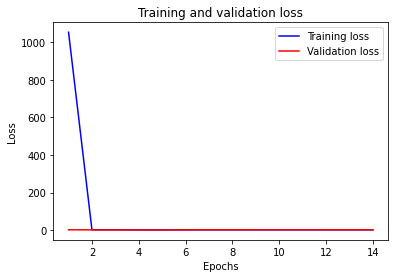

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Training과 Valdation Loss가 Epoch는 2이전 매우 큰 차이를 보이고

2 이후 거의 동일한 모양을 보였기 때문에 좋은 모델이라고는 할 수 없다 .


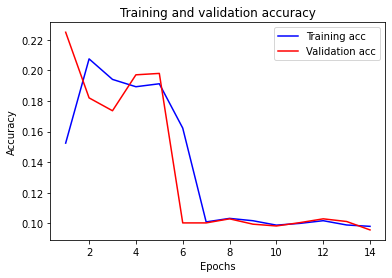

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Training과 Validation의 Accuracy가  Epoch는 8이후 비슷한 값을 보이나 그 전에 

큰 차이를 보이고 있다. 따라서 좋지 못한 모델이라고 할 수 있다. 

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.7876 - accuracy: 0.1939
test loss: 1.7876484394073486
test_accuracy: 0.193900004029274


베이스 모델 0.8554에 비해 Model4는 정확도가 0.1939로 매우 낮게 나타났다. 초기 epoch에서는 정확도가 0.2정도로 시작했지만 epoch이 6이 되면서 오히려 0.1로 정확도가 매우 떨어졌다. 이는 학습률이 클 경우 데이터가 무질서하게 이탈하여 loss의 최저점에 도달하지 못하고 정확도가 매우 떨어지는 형태를 보여준다. learning rate가 낮으면 매우 세밀하게 학습하여 많이 학습하다보면 시간이 오래걸려 최적점에 도달하지 못하는모습을 보인다. 반대로 learning rate가 높으면 너무 크게크게 학습하여 학습하면서 놓치게 되어 손실을 오해려 증가시키는 상황을 유발한다. 

# Optimizer

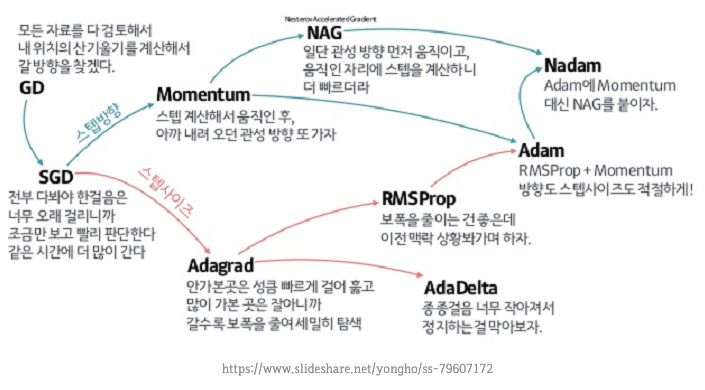

## Model5: hidden layer 2개 (노드: 각 32개, 8개), lr:0.01, batch size:1024, epoch: 300 (early stopping 28), optimizer: Adam

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.Adam(lr=0.01),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
47/47 [==============================] - 3s 9ms/step - loss: 1.1446 - accuracy: 0.5807 - val_loss: 0.6892 - val_accuracy: 0.7682 - lr: 0.0100
Epoch 2/300
47/47 [==============================] - 0s 5ms/step - loss: 0.5793 - accuracy: 0.7850 - val_loss: 0.5420 - val_accuracy: 0.7970 - lr: 0.0100
Epoch 3/300
47/47 [==============================] - 0s 6ms/step - loss: 0.5019 - accuracy: 0.8205 - val_loss: 0.4808 - val_accuracy: 0.8288 - lr: 0.0100
Epoch 4/300
47/47 [==============================] - 0s 5ms/step - loss: 0.4525 - accuracy: 0.8417 - val_loss: 0.4438 - val_accuracy: 0.8399 - lr: 0.0100
Epoch 5/300
47/47 [==============================] - 0s 5ms/step - loss: 0.4195 - accuracy: 0.8515 - val_loss: 0.4275 - val_accuracy: 0.8505 - lr: 0.0100
Epoch 6/300
47/47 [==============================] - 0s 6ms/step - loss: 0.4053 - accuracy: 0.8549 - val_loss: 0.4198 - val_accuracy: 0.8515 - lr: 0.0100
Epoch 7/300
47/47 [==============================] - 0s 6ms/step - loss: 0.3

Early Stopping Model을 사용하였기 때문에 
Epcoh 18에서 val_loss가 0.3660으로 로 최소가 된후 10번의 추가 Epoch에서 



Val_loss의 최솟값이 더이상 감소하지 않았다. 따라서 모델을 조기 종료하고 epoch 18일때가 최적 Epoch임을 확인하였다.

최적 Epoch일때 loss=0.3048 , accuracy: 0.8883 ,val_loss= 0.3660, val_accuracy= 0.8726 임을 알 수 있었다.

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


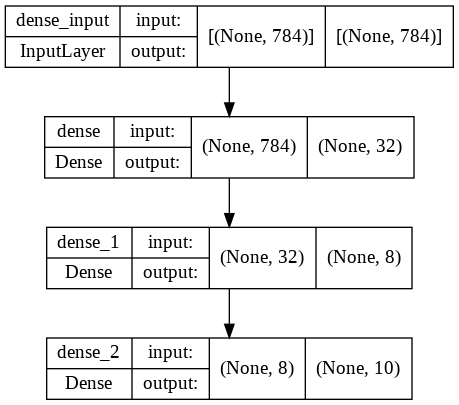

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

총 784개의 input node( 28*28의 input shape를 설정) , Hidden Layer의 노드를 각각 32,8로 설정하였으며,

Output Layer의 ndoe를 10개(Class의 수)의 output node로 설정하였다.

설정한대로 Hidden Layer가 형성되었다.


In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.1294353 ,  0.37198237,  0.3090879 , ..., -0.03708556,
         -0.5710383 , -0.04712605],
        [-0.6065793 , -0.3749355 ,  0.5330672 , ..., -0.15528135,
         -1.5157005 ,  0.89955246],
        [-0.6416843 , -0.8174453 ,  1.0934069 , ..., -0.34453622,
         -0.1959105 ,  0.7527864 ],
        ...,
        [-0.3732037 , -0.33902967,  0.35187176, ...,  0.07625501,
         -0.07544385,  0.04033037],
        [-0.14735332,  0.50789154, -0.08218078, ...,  0.54125226,
          0.49266008,  0.7999359 ],
        [ 0.32696775,  0.06632225,  0.77375406, ...,  0.25048018,
         -0.81469077,  0.29690152]], dtype=float32),
 array([-0.25296417,  0.5379913 , -0.13137376, -0.06962035,  0.79105467,
         0.5329925 ,  0.5929693 , -0.06010758, -0.05985759, -0.03017464,
        -0.08097975, -0.04456302, -0.37820232,  0.04925785, -0.06004789,
         0.6924639 ,  0.5502622 , -0.06003438, -0.09631425, -0.15178646,
        -0.0752669 ,  1.0394077 , -0.04835738,  0.22895575, -0.335

대표적으로 Hidden Layer(노드:4)->Output Layer(노드:10)인 경우

첫 노드의 Weight와 전체 Bias를 확인한다. 

Weight

[ 0.04825012,  0.8205727 , -0.20738252, -0.18275313,  0.38560808,
         -0.10698012, -0.4995352 ,  0.02276021,  0.04525079, -0.36644444]

Bias

[ 0.04469804, -0.01327478, -0.02819792,  0.8563734 , -0.53998864,
         0.63782346,  0.2599197 ,  0.31324443, -0.5501848 , -0.9579729 ]

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

0         1         2         3         4         5         6   \
0   -0.129435  0.371982  0.309088  0.049214 -0.066849  0.028279  0.903913   
1   -0.606579 -0.374936  0.533067 -0.014533 -0.013800  0.006562  0.900615   
2   -0.641684 -0.817445  1.093407 -0.020188 -0.115828 -0.064753  0.282562   
3   -0.552746 -0.787759  0.542723 -0.059135 -0.076144 -0.016975 -0.088360   
4   -0.887061 -0.230584 -1.695416  0.058942 -0.206452 -0.033304  2.217435   
..        ...       ...       ...       ...       ...       ...       ...   
779 -0.041586  0.091997  0.775159  0.024485  0.001578 -0.150488 -0.152949   
780 -0.398438 -0.207389  0.625346 -0.039345  0.048722 -0.091310 -0.222832   
781 -0.373204 -0.339030  0.351872 -0.092340  0.338532 -0.147400 -0.173236   
782 -0.147353  0.507892 -0.082181 -0.142141  0.218123 -0.167606  0.044248   
783  0.326968  0.066322  0.773754 -0.061057  0.020338  0.029099  0.871276   

           7         8         9   ...        22        23        24  \
0   -0.043060 -0.013966 -0.063100  ...  0.175489  0.484883  0.901531   
1   -0.041779 -0.063906 -0.004363  ...  0.368796 -1.763296 -0.213839   
2    0.044561  0.035590  0.002820  ...  0.972469  0.006038 -0.877830   
3    0.039809 -0.033010  0.048456  ...  0.063549  0.077294  0.101107   
4    0.031856 -0.007047  0.005856  ... -0.167972 -0.011276  0.783149   
..        ...       ...       ...  ...       ...       ...       ...   
779  0.064998 -0.145345  0.044493  ...  0.381818 -0.216686 -0.143173   
780  0.125638 -0.123064  0.061014  ...  0.564179  0.227044 -0.239327   
781  0.064269 -0.015639 -0.002547  ...  0.987138  0.309771  0.036239   
782 -0.006188  0.040977  0.063192  ...  0.645623  0.077021  0.094467   
783  0.028472 -0.011866  0.059270  ...  0.102068  0.476542  0.174554   

           25        26        27        28        29        30        31  
0   -0.002460 -0.110288  0.181556 -0.021526 -0.037086 -0.571038 -0.047126  
1    0.041268  0.197102  0.049888 -0.007887 -0.155281 -1.515700  0.899552  
2    0.106897  0.993485 -0.853235 -0.063976 -0.344536 -0.195910  0.752786  
3    0.057510  0.473136 -0.697766  0.073883 -0.420511  1.094910 -0.307674  
4   -0.004806 -0.553056 -0.172847 -0.086555 -0.708549  0.191994  0.471879  
..        ...       ...       ...       ...       ...       ...       ...  
779 -0.017957 -0.523281 -0.168653 -0.005619  0.245735  0.517487  0.041360  
780 -0.026093  0.220044 -0.251513 -0.038488 -0.218690  0.553630 -0.028366  
781 -0.088112  0.575114  0.046232 -0.035455  0.076255 -0.075444  0.040330  
782 -0.027269 -0.117073  0.318895  0.026297  0.541252  0.492660  0.799936  
783 -0.018535  0.379359  0.401379 -0.119301  0.250480 -0.814691  0.296902  

[784 rows x 32 columns]

In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

0
0  -0.252964
1   0.537991
2  -0.131374
3  -0.069620
4   0.791055
5   0.532992
6   0.592969
7  -0.060108
8  -0.059858
9  -0.030175
10 -0.080980
11 -0.044563
12 -0.378202
13  0.049258
14 -0.060048
15  0.692464
16  0.550262
17 -0.060034
18 -0.096314
19 -0.151786
20 -0.075267
21  1.039408
22 -0.048357
23  0.228956
24 -0.335815
25 -0.058052
26  0.221164
27  0.213324
28 -0.058712
29  0.404179
30 -0.249208
31 -0.037659

In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

0         1         2         3         4         5         6  \
0  -0.558564  0.878028 -0.513022 -0.849730 -0.143074  0.197251 -0.133605   
1  -0.078635  0.449435 -0.005531  0.013535  1.028393  0.358357 -0.128865   
2  -0.018876 -0.354168  0.334090  0.329219  0.143072  0.329246 -0.169336   
3  -0.241298  0.283047  0.245228 -0.326165 -0.239320  0.240767 -0.398541   
4  -0.428310 -0.042684 -0.510040  0.442519 -0.198216  0.658802 -0.418605   
5   0.249660 -0.260567 -0.104553  0.132889 -0.332928  0.965184 -0.807267   
6   0.087423 -0.804952  0.529359 -0.056367 -0.093860  0.376984  0.103878   
7   0.186856  0.104185 -0.232981  0.164349 -0.005671 -0.429663 -0.080718   
8   0.254546 -0.117113 -0.072097 -0.231550 -0.042107  0.041544  0.104744   
9   0.175908  0.068441 -0.218861  0.250040 -0.236460 -0.327442  0.415191   
10 -0.036654  0.207517  0.243036  0.139382  0.043100 -0.017420  0.031423   
11 -0.090394  0.677618  0.569541  0.218845 -0.630159  0.431133  0.535349   
12  0.071490 -0.420027  0.079923 -0.120216 -0.412370 -0.358067  0.444789   
13 -0.391258  0.376742  0.511586 -0.273257 -0.528267  0.467646  0.437998   
14 -0.311977  0.223514  0.011060 -0.184637 -0.006915  0.027913 -0.182623   
15 -0.055567  0.400728 -0.506984 -0.040153  0.495014  0.411653  0.608914   
16 -0.567869 -0.418076  0.035314  0.717942  0.475730 -0.131013  0.295664   
17 -0.206269 -0.285526  0.244065  0.119518 -0.100634 -0.247924 -0.293044   
18  0.025276 -0.252107 -0.256584 -0.055444  0.047167 -0.017339  0.128118   
19 -0.413588 -0.343105 -0.224458  0.059246  0.258793  0.134203  0.233172   
20  0.296941 -0.212835 -0.133111  0.008032  0.370234  0.043345 -0.258662   
21 -0.372476  0.532563  0.568531  0.075356 -0.216874  0.098895  0.550778   
22  0.103987 -0.042241  0.384552  0.337500  0.319918 -0.230530  0.442911   
23 -0.387109  0.224265 -0.296181 -0.466037  0.422380 -0.299598 -0.289203   
24 -0.063479 -0.336995  0.378531 -0.421130  0.083506 -0.025605 -0.150712   
25 -0.356525  0.082508  0.104402 -0.290789 -0.321530  0.034981 -0.009120   
26 -0.247370  0.105265 -0.125210  0.072169 -0.303760 -0.385301 -0.032911   
27 -0.295728  0.127777  0.464538 -0.043437  0.063988  0.501956 -0.460522   
28  0.110547  0.019826  0.118048  0.275368 -0.176225  0.409641  0.165867   
29 -0.301047 -0.190293 -0.106872 -0.372411  0.076121  0.725717 -0.475837   
30  0.184142  0.267964 -0.428383  0.286585  0.341808 -0.421003  0.344737   
31 -0.099082 -0.619156  0.108357 -0.270624 -0.385127  0.385788  0.072015   

           7  
0   0.456375  
1  -0.079408  
2   0.571890  
3  -0.313612  
4   0.271926  
5  -0.830626  
6  -0.727983  
7   0.171728  
8   0.053403  
9   0.147515  
10  0.016938  
11 -0.417496  
12 -0.157376  
13 -0.008836  
14 -0.366425  
15  0.313960  
16  0.514773  
17 -0.286391  
18 -0.130955  
19  0.262473  
20  0.242862  
21  0.496634  
22  0.173166  
23  0.148706  
24 -0.337529  
25 -0.216391  
26  1.180681  
27 -0.156904  
28  0.096898  
29  0.258579  
30 -0.238569  
31  0.119312

In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

0
0 -0.112090
1  0.561673
2 -0.053823
3  0.055379
4 -0.081470
5  0.215321
6 -0.161376
7  0.477240

In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

loss,accuracy, val_loss, val_accuracy가 Epoch가 진행됨에 따라 어떻게 변하는지 확인한다.

 Ir(학습률=0.1로 고정)

In [ ]:
cls_history.history

{'accuracy': [0.5806875228881836,
  0.7850416898727417,
  0.8205416798591614,
  0.8416875004768372,
  0.8514583110809326,
  0.854854166507721,
  0.8618749976158142,
  0.8659999966621399,
  0.8711458444595337,
  0.8724166750907898,
  0.871958315372467,
  0.8770624995231628,
  0.8787083625793457,
  0.8787500262260437,
  0.8831250071525574,
  0.882520854473114,
  0.882979154586792,
  0.8883125185966492,
  0.8869791626930237,
  0.890749990940094,
  0.8896458148956299,
  0.8885208368301392,
  0.8910208344459534,
  0.8937708139419556,
  0.8948749899864197,
  0.8958125114440918,
  0.895145833492279,
  0.8961666822433472],
 'loss': [1.1446168422698975,
  0.5792565941810608,
  0.5019245743751526,
  0.45251888036727905,
  0.4194985032081604,
  0.40533125400543213,
  0.38894352316856384,
  0.37197428941726685,
  0.35764819383621216,
  0.35452619194984436,
  0.35279199481010437,
  0.3418879508972168,
  0.3323277533054352,
  0.33066052198410034,
  0.3204542100429535,
  0.32031530141830444,
  0.3177

Accuracy의 경우 Epcoh가 진행될 수록 그 값이 커졌으며

Loss의 경우도 Epoch가 진행될 수록 값이 감소하였지만

Val_accuracy 경우 역시  Epcoh가 진행될 수록 그 값이 커졌지만

Val_loss의 경우 Epoch가 18일 때 최솟 값을 보 이고 그 후 증가와 감소를 반복하였다.

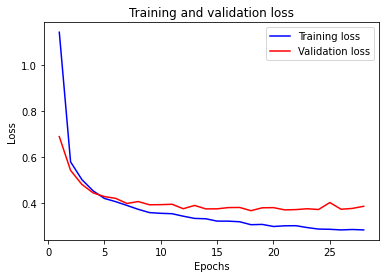

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch가 5까지 Validation Loss와 Training loss가 비슷한 모양을 보였으나

이 후 Epoch가 커질수록 그 차이가 벌어지는 모양을 띠었다. 따라서 모델이 적합하다고 하기에는 힘들다.

Validation Loss의 경우 Epoch=18에서 가장 작은 값을 보이고, 이때 Training Loss와 

가장 비슷할 것으로 에상된다.

Validation Loss로 Epcoh를 판단할 경우 Epoch=18이 된다.


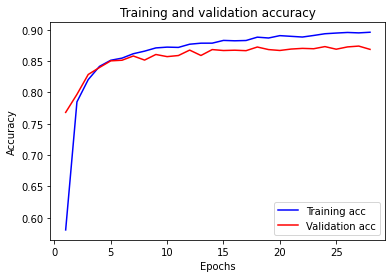

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch가 5까지 Validation Accuracy와 Training Accuracy가 비슷한 모양을 보였으나

이 후 Epoch가 커질수록 그 차이가 벌어지는 모양을 띠었다. 따라서 모델이 적합하다고 하기에는 힘들다.

Validation Accuracy의 경우 Epoch=18에서 큰 값을 보이고, 이때 Training Accuracy와 

가장 비슷할 것으로 에상된다.

Validation Accuracy로 Epcoh를 판단할 경우 Epoch=18이 된다.


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8630
test loss: 0.39275121688842773
test_accuracy: 0.8629999756813049


베이스 모델 0.8554에 비해 0.8629로 정확도가 0.0075 증가하였다. 이는 RMSProp은 안가본곳은 빠르게 훑고, 많이 가본 곳은 보폭을 줄여 세밀히 탐색하면서도 이전 맥락 상황을 봐가면서 한다. 하지만 이는 스텝사이즈만 고려하는 방식이다. 반면 Adam의 경우 RMSProp에 Momentum을 추가로 사용해주어 스텝 계산을 하여 움직인 후 내려오던 관성 방향으로 다시 탐색하여 방향과 스텝사이즈를 모두 적절하게 사용하도록 한다. 따라서 스텝사이즈를 고려했던 RMSProp에 비해 Adam optimizer를 사용한 경우 방향을 추가로 최적화 하기 때문에 더 높은 정확도가 나왔다. 

https://needjarvis.tistory.com/685


## Model6: hidden layer 2개 (노드: 각 32개, 8개), lr:0.01, batch size:1024, epoch: 300 (early stopping 42), optimizer: SGD

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.SGD(lr=0.01),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
47/47 [==============================] - 1s 13ms/step - loss: 2.1140 - accuracy: 0.2304 - val_loss: 1.9534 - val_accuracy: 0.3049 - lr: 0.0100
Epoch 2/300
47/47 [==============================] - 0s 7ms/step - loss: 1.8560 - accuracy: 0.3334 - val_loss: 1.7687 - val_accuracy: 0.3656 - lr: 0.0100
Epoch 3/300
47/47 [==============================] - 0s 7ms/step - loss: 1.7042 - accuracy: 0.3846 - val_loss: 1.6371 - val_accuracy: 0.4252 - lr: 0.0100
Epoch 4/300
47/47 [==============================] - 0s 7ms/step - loss: 1.5837 - accuracy: 0.4455 - val_loss: 1.5224 - val_accuracy: 0.4813 - lr: 0.0100
Epoch 5/300
47/47 [==============================] - 0s 7ms/step - loss: 1.4753 - accuracy: 0.5080 - val_loss: 1.4193 - val_accuracy: 0.5417 - lr: 0.0100
Epoch 6/300
47/47 [==============================] - 0s 7ms/step - loss: 1.3779 - accuracy: 0.5527 - val_loss: 1.3255 - val_accuracy: 0.5714 - lr: 0.0100
Epoch 7/300
47/47 [==============================] - 0s 7ms/step - loss: 1.

Early Stopping model을 사용하였지만 val_loss가 Epoch가 진행됨에 따라 지속적으로 감소하였기 때문에 300회의 Epoch를 모두 시행하였다 

Epoch가 300일때 loss=0.3776, accuracy=0.8687, val_loss=0.4095 , val_accruacy= 0.8575

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


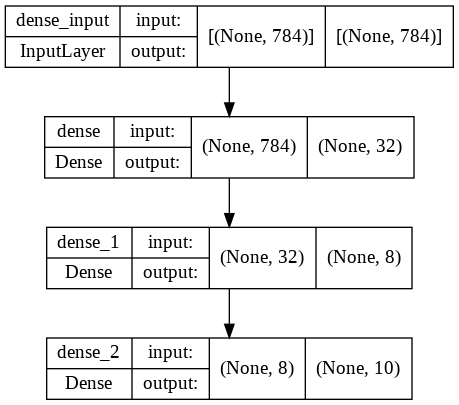

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

총 784개의 input node( 28*28의 input shape를 설정) , Hidden Layer의 노드를 각각 32,8로 설정하였으며,

Output Layer의 ndoe를 10개(Class의 수)의 output node로 설정하였다.

설정한대로 Hidden Layer가 형성되었다.


In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.08491757,  0.07999064,  0.00305296, ..., -0.0312509 ,
          0.01598496, -0.04409341],
        [-0.02876206, -0.0142935 , -0.00599126, ...,  0.06820752,
         -0.00184686, -0.00456913],
        [-0.04479873,  0.04195406, -0.00290393, ...,  0.05554197,
         -0.05289482,  0.08305782],
        ...,
        [ 0.01366501,  0.006689  , -0.03866477, ..., -0.02525094,
         -0.00671584, -0.08547865],
        [ 0.08553257,  0.05344753,  0.00972732, ..., -0.06640883,
          0.01891251, -0.08986539],
        [ 0.04573954, -0.05180719,  0.0767955 , ..., -0.0023042 ,
         -0.00574279,  0.07881196]], dtype=float32),
 array([-0.09773576,  0.1292427 , -0.15740089,  0.00993974,  0.29706535,
         0.20865826,  0.00821482, -0.02185993, -0.04007899,  0.00343565,
        -0.08376747,  0.07394678,  0.07288938,  0.12415335, -0.01444219,
         0.2035896 ,  0.07169134, -0.02375595,  0.09974258,  0.12614538,
        -0.15735422,  0.15080479, -0.1841719 ,  0.01460779, -0.208

대표적으로 Hidden Layer(노드:8)->Output Layer(노드:10)인 경우

첫 노드의 Weight와 전체 Bias를 확인한다. 

Weight

[-0.29721883,  1.0867218 , -0.11932204,  0.08081191,  0.46843597,
         -0.09851693, -1.2968371 ,  0.01201606,  0.22078517, -0.44806203]

Bias

[ 0.01087771, -0.05779615,  0.05257397,  0.6225841 , -0.216032  ,
         0.67893404,  0.1212814 , -0.11321762, -0.50099283, -0.5982106 ]



순차적으로 Weight와 Bias를 확인한다.

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

0         1         2         3         4         5         6   \
0   -0.084918  0.079991  0.003053  0.049214 -0.078871  0.028299 -0.057566   
1   -0.028762 -0.014294 -0.005991 -0.014533  0.056918  0.029598 -0.015373   
2   -0.044799  0.041954 -0.002904 -0.020191  0.005065  0.003333 -0.012846   
3   -0.069451  0.017592 -0.049670 -0.064001  0.009741  0.053993 -0.084640   
4   -0.054149  0.022556 -0.079034  0.058943  0.026480  0.052462 -0.029807   
..        ...       ...       ...       ...       ...       ...       ...   
779  0.050174  0.062585  0.092795  0.070804  0.076975 -0.098159 -0.017172   
780 -0.020256 -0.039085  0.048904  0.008969 -0.013758 -0.023517  0.078118   
781  0.013665  0.006689 -0.038665 -0.049271  0.017141 -0.066688  0.016227   
782  0.085533  0.053448  0.009727 -0.082808  0.019506 -0.085242 -0.020591   
783  0.045740 -0.051807  0.076796 -0.061057  0.016242  0.047308 -0.042021   

           7         8         9   ...        22        23        24  \
0   -0.043202 -0.013916 -0.063159  ... -0.001533  0.083843  0.042530   
1   -0.031034 -0.054759  0.006610  ... -0.065925 -0.084348 -0.049535   
2   -0.008639  0.077560  0.000650  ...  0.017755 -0.060295 -0.030742   
3   -0.008651  0.021982 -0.000726  ...  0.007920 -0.025714  0.082487   
4    0.027904  0.044347 -0.042872  ...  0.028248  0.021930 -0.011901   
..        ...       ...       ...  ...       ...       ...       ...   
779  0.056575 -0.086229  0.013498  ...  0.021947 -0.015428 -0.092685   
780  0.053649 -0.069235  0.023105  ...  0.057119 -0.050464 -0.033838   
781 -0.003528  0.049921 -0.016592  ...  0.003331  0.012855 -0.032186   
782  0.038979 -0.010922 -0.005216  ...  0.090866 -0.079020 -0.054558   
783  0.078644 -0.008416  0.029211  ... -0.030856  0.046983  0.010159   

           25        26        27        28        29        30        31  
0   -0.002351 -0.081157  0.057151 -0.021491 -0.031251  0.015985 -0.044093  
1    0.041388  0.043012  0.043905 -0.007811  0.068208 -0.001847 -0.004569  
2    0.079683 -0.054460  0.032560 -0.041351  0.055542 -0.052895  0.083058  
3    0.006264  0.027093  0.074566  0.037370  0.004029  0.009397 -0.036655  
4    0.039012 -0.023186  0.024689 -0.063109 -0.039647  0.072341 -0.013947  
..        ...       ...       ...       ...       ...       ...       ...  
779 -0.056995  0.018468 -0.013572  0.044067  0.037782  0.147615  0.020003  
780 -0.006489  0.020833  0.004788  0.017346 -0.008129  0.126544 -0.098227  
781  0.017030  0.052543 -0.094981  0.039728 -0.025251 -0.006716 -0.085479  
782 -0.009496  0.013455  0.036224  0.081912 -0.066409  0.018913 -0.089865  
783  0.026296 -0.038959  0.060284 -0.078569 -0.002304 -0.005743  0.078812  

[784 rows x 32 columns]

In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

0
0  -0.097736
1   0.129243
2  -0.157401
3   0.009940
4   0.297065
5   0.208658
6   0.008215
7  -0.021860
8  -0.040079
9   0.003436
10 -0.083767
11  0.073947
12  0.072889
13  0.124153
14 -0.014442
15  0.203590
16  0.071691
17 -0.023756
18  0.099743
19  0.126145
20 -0.157354
21  0.150805
22 -0.184172
23  0.014608
24 -0.208295
25  0.184840
26 -0.049860
27 -0.002066
28  0.028440
29  0.159466
30 -0.158393
31  0.244827

In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

0         1         2         3         4         5         6  \
0  -0.198659  0.337525 -0.793751 -0.145988  0.277421 -0.387084  0.045357   
1   0.149076  0.504220 -0.134974 -0.129817  0.450828  0.634226  0.178560   
2   0.045058 -0.467593  0.447342  0.064548  0.039624  0.092252 -0.504539   
3  -0.193049  0.267404  0.335725 -0.261912 -0.144901  0.145297 -0.326038   
4  -0.666607 -0.070170 -0.634560  0.451649 -0.165389  0.434263  0.133453   
5   0.657708 -0.568112 -0.162790  0.173886 -0.080779  0.358163 -0.607134   
6   0.043451 -0.869309  0.596420 -0.080427  0.155679  0.018688 -0.275100   
7   0.512502  0.338488 -0.415013  0.231413 -0.065396 -0.409725 -0.083076   
8   0.583093 -0.161314  0.048913 -0.260129 -0.213541  0.155877 -0.064474   
9   0.310927  0.099981 -0.136699  0.317693 -0.281387 -0.426838  0.644609   
10 -0.046176  0.164231  0.597836  0.240993  0.200621 -0.123166  0.066864   
11  0.174534  0.396963  0.340812  0.325921 -0.259381  0.172701  0.462575   
12  0.008838 -0.262758 -0.128350 -0.007206 -0.300707 -0.327491  0.579991   
13 -0.102776  0.532501  0.729066 -0.154406 -0.163528  0.493249 -0.059775   
14 -0.322459  0.280818 -0.055638 -0.126494  0.044190 -0.026874 -0.122883   
15  0.023393  0.527429 -0.047747  0.080136  0.438162  0.641464  0.403546   
16 -0.480098 -0.054040  0.073235  0.308209  0.370836 -0.048426 -0.026472   
17 -0.147158 -0.344292  0.298881  0.178847 -0.043513 -0.303808 -0.234921   
18  0.113401 -0.150619 -0.599554  0.004023  0.118861  0.013182  0.117548   
19 -0.645644 -0.492305 -0.036329  0.125113  0.553756  0.153147  0.454207   
20  0.690115 -0.345562 -0.168889  0.105249  0.533232  0.153234 -0.484689   
21 -0.014920  0.529387  0.332089 -0.002953 -0.499791 -0.088256  0.321066   
22  0.470560 -0.154343  0.670933  0.393511  0.259947 -0.338892  0.387002   
23 -0.441905  0.412411 -0.058321 -0.512937  0.687567 -0.240679 -0.155116   
24  0.070995 -0.325461  0.645916 -0.148765  0.052896 -0.090171 -0.420972   
25 -0.443592  0.207817  0.204934 -0.521128 -0.430008  0.165485  0.018859   
26 -0.106094  0.411066 -0.134150 -0.027963  0.188930 -0.054943 -0.126753   
27 -0.308612  0.181665  0.616363 -0.123343  0.161572  0.329691 -0.158655   
28  0.286590 -0.031617  0.118851  0.295680 -0.321333  0.424915  0.254299   
29 -0.292701 -0.207147 -0.179953 -0.255964  0.292240  0.625252 -0.447613   
30  0.509952  0.290429 -0.100363  0.308279  0.526956 -0.595009  0.520465   
31 -0.123529 -0.453857 -0.105129 -0.423729 -0.453234  1.085461  0.126097   

           7  
0   0.141918  
1  -0.287828  
2   0.517158  
3  -0.365322  
4   0.438774  
5  -0.432477  
6  -0.353341  
7   0.164089  
8   0.028376  
9   0.107494  
10 -0.059346  
11  0.071813  
12 -0.212528  
13 -0.067219  
14 -0.302189  
15  0.074599  
16  0.366479  
17 -0.225461  
18  0.073838  
19  0.501183  
20  0.497944  
21  0.699297  
22  0.351652  
23  0.035872  
24 -0.603321  
25 -0.121616  
26  0.594807  
27 -0.346209  
28  0.039550  
29  0.522140  
30 -0.377065  
31  0.193658

In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

0
0 -0.110024
1  0.063836
2 -0.174489
3 -0.107360
4 -0.169881
5  0.317708
6  0.181569
7  0.103689

In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
cls_history.history

{'accuracy': [0.2304375022649765,
  0.3333541750907898,
  0.38464581966400146,
  0.4455208480358124,
  0.50802081823349,
  0.5527499914169312,
  0.5772500038146973,
  0.601895809173584,
  0.6412291526794434,
  0.6740833520889282,
  0.6922500133514404,
  0.7020833492279053,
  0.7099791765213013,
  0.7146250009536743,
  0.7194166779518127,
  0.7245000004768372,
  0.7286666631698608,
  0.731416642665863,
  0.7356874942779541,
  0.7379375100135803,
  0.7415000200271606,
  0.7454166412353516,
  0.7478125095367432,
  0.7512083053588867,
  0.7553125023841858,
  0.757895827293396,
  0.7603958249092102,
  0.7632916569709778,
  0.7663958072662354,
  0.7681249976158142,
  0.7706458568572998,
  0.7728750109672546,
  0.7744791507720947,
  0.7770000100135803,
  0.7794583439826965,
  0.781499981880188,
  0.7837916612625122,
  0.785729169845581,
  0.7873541712760925,
  0.789104163646698,
  0.7903333306312561,
  0.7927291393280029,
  0.793874979019165,
  0.7950833439826965,
  0.7974166870117188,
  0.79

Epcoh가 진행됨에 따라 loss,Val_loss 모두 감소하는 형상을 보였으며

accuracy와 Val_accuracy 모두 증가하는 형상을 보였다 

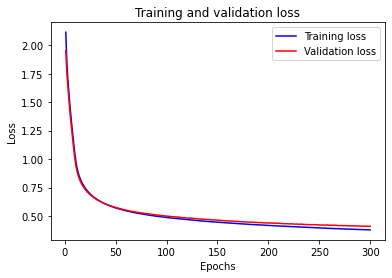

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Validation Loss와 Training Loss가 거의 일치하는 모습을 보였다. 

따라서 모델이 잘 형성되었음을 알 수 있었다.

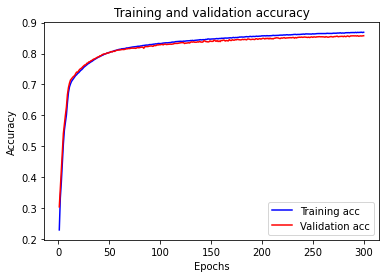

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Validation Accuracy와 Training Accuracy가 거의 일치하는 모습을 보였다. 

따라서 모델이 잘 형성되었음을 알 수 있었다.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4337 - accuracy: 0.8448
test loss: 0.43370386958122253
test_accuracy: 0.8447999954223633


Model6는 정확도가 0.8448로 베이스모델인 0.8554와 0.863에 비해 낮게 나왔다. SGD는 Gradient Descent 알고리즘에서 유래되었는데 경사를 따라가면서 가중치를 update시키는 방식이다. 하지만 이는 full batch로 epoch마다 수정을 하게 된다. 번거러운 과정을 극복해낸 것이 SGD로 full batch로 epoch마다 weight을 수정하지 않고 빠르게 mini-batch로 가중치를 수정하면서 학습시킨다. 하지만 RMSProp은 안가본 곳은 빠르게 훑고 가본곳은 세밀하게 탐색하며 이전 맥락 상황을 파악한다. Adam은 여기에 더해 방향과 스텝사이즈를 모두 적절하게 훑어 가장 좋은 성능을 보여준다. 

# 최적의 성능 모델 Model7: hidden layer 2개 (노드: 각 32개, 8개), lr:0.01, batch size:1024, epoch: 300 (28 early stopping ), optimizer: Adam


6. 여러 모델을 실험 (loss, metrics 해석) 하고 최적의 성능을 가지는 결과를 제시 (validation set을 구분하거나 cross validation 설정)

하이퍼 파라미터들을 조정해가면서 최적의 결과를 찾아보았다. hidden layer의 경우 layer와 노드가 너무 적거나 많으면 안되기에 hidden layer 2개로 각각 노드 32개, 8개로 설정해주었다. lr또한 너무 크면 정확도가 오히려 떠러지고 lr이 너무 작으면 epoch의 수가 많으면 정확도가 올라가나 너무 오래걸린다는 단점에 의해 learning rate를 0.01로 설정하였다.  SGD, RSprop에 비해 Adam 이 좋은 optimizer로 나타났다. 따라서 hidden layer 2개 (노드: 각 32개, 8개), lr:0.01, batch size:1024, epoch: 300 (28 early stopping ), optimizer: Adam를 사용하였다. 

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.Adam(lr=0.01),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
47/47 [==============================] - 4s 17ms/step - loss: 1.1446 - accuracy: 0.5807 - val_loss: 0.6892 - val_accuracy: 0.7682 - lr: 0.0100
Epoch 2/300
47/47 [==============================] - 0s 8ms/step - loss: 0.5793 - accuracy: 0.7850 - val_loss: 0.5420 - val_accuracy: 0.7970 - lr: 0.0100
Epoch 3/300
47/47 [==============================] - 0s 7ms/step - loss: 0.5019 - accuracy: 0.8205 - val_loss: 0.4808 - val_accuracy: 0.8288 - lr: 0.0100
Epoch 4/300
47/47 [==============================] - 0s 7ms/step - loss: 0.4525 - accuracy: 0.8417 - val_loss: 0.4438 - val_accuracy: 0.8399 - lr: 0.0100
Epoch 5/300
47/47 [==============================] - 0s 7ms/step - loss: 0.4195 - accuracy: 0.8515 - val_loss: 0.4275 - val_accuracy: 0.8505 - lr: 0.0100
Epoch 6/300
47/47 [==============================] - 0s 7ms/step - loss: 0.4053 - accuracy: 0.8549 - val_loss: 0.4198 - val_accuracy: 0.8515 - lr: 0.0100
Epoch 7/300
47/47 [==============================] - 0s 7ms/step - loss: 0.

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


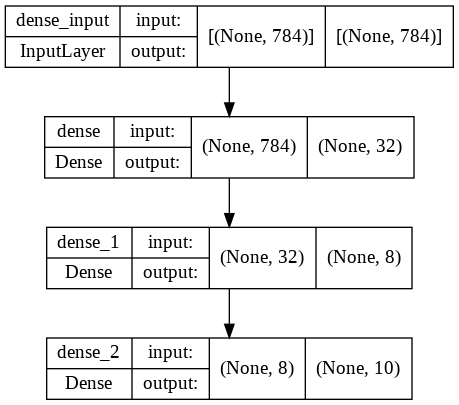

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-0.1294353 ,  0.37198228,  0.30908772, ..., -0.03708562,
         -0.5710382 , -0.04712606],
        [-0.6065797 , -0.37493494,  0.5330665 , ..., -0.15528083,
         -1.5156999 ,  0.8995519 ],
        [-0.64168483, -0.81744456,  1.0934064 , ..., -0.34453517,
         -0.19591053,  0.7527854 ],
        ...,
        [-0.37320378, -0.33902967,  0.35187218, ...,  0.07625473,
         -0.07544385,  0.04033025],
        [-0.14735354,  0.50789165, -0.08218073, ...,  0.54125106,
          0.49266034,  0.79993516],
        [ 0.32696775,  0.06632245,  0.77375394, ...,  0.25047934,
         -0.81468946,  0.29690027]], dtype=float32),
 array([-0.25296417,  0.53799117, -0.13137369, -0.06962033,  0.7910561 ,
         0.53299284,  0.59296954, -0.06010755, -0.0598576 , -0.03017458,
        -0.08097976, -0.04456356, -0.37820217,  0.04925779, -0.06004789,
         0.6924634 ,  0.5502629 , -0.06003438, -0.09631423, -0.15178627,
        -0.07526691,  1.0394075 , -0.04835739,  0.22895597, -0.335

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

0         1         2         3         4         5         6   \
0   -0.129435  0.371982  0.309088  0.049214 -0.066849  0.028279  0.903913   
1   -0.606580 -0.374935  0.533067 -0.014533 -0.013800  0.006562  0.900616   
2   -0.641685 -0.817445  1.093406 -0.020188 -0.115828 -0.064753  0.282562   
3   -0.552746 -0.787758  0.542724 -0.059135 -0.076143 -0.016974 -0.088361   
4   -0.887062 -0.230583 -1.695415  0.058942 -0.206452 -0.033304  2.217436   
..        ...       ...       ...       ...       ...       ...       ...   
779 -0.041587  0.091997  0.775159  0.024485  0.001578 -0.150488 -0.152949   
780 -0.398438 -0.207389  0.625346 -0.039345  0.048722 -0.091310 -0.222832   
781 -0.373204 -0.339030  0.351872 -0.092340  0.338532 -0.147400 -0.173236   
782 -0.147354  0.507892 -0.082181 -0.142141  0.218122 -0.167606  0.044248   
783  0.326968  0.066322  0.773754 -0.061057  0.020338  0.029099  0.871276   

           7         8         9   ...        22        23        24  \
0   -0.043060 -0.013966 -0.063100  ...  0.175490  0.484884  0.901531   
1   -0.041779 -0.063906 -0.004363  ...  0.368795 -1.763295 -0.213838   
2    0.044561  0.035590  0.002820  ...  0.972469  0.006039 -0.877829   
3    0.039809 -0.033010  0.048456  ...  0.063548  0.077294  0.101106   
4    0.031856 -0.007047  0.005856  ... -0.167972 -0.011277  0.783149   
..        ...       ...       ...  ...       ...       ...       ...   
779  0.064998 -0.145345  0.044493  ...  0.381818 -0.216686 -0.143173   
780  0.125638 -0.123064  0.061014  ...  0.564180  0.227044 -0.239327   
781  0.064269 -0.015639 -0.002547  ...  0.987138  0.309771  0.036239   
782 -0.006188  0.040977  0.063192  ...  0.645624  0.077021  0.094467   
783  0.028472 -0.011866  0.059270  ...  0.102069  0.476541  0.174555   

           25        26        27        28        29        30        31  
0   -0.002460 -0.110286  0.181556 -0.021526 -0.037086 -0.571038 -0.047126  
1    0.041268  0.197101  0.049888 -0.007887 -0.155281 -1.515700  0.899552  
2    0.106897  0.993485 -0.853234 -0.063976 -0.344535 -0.195911  0.752785  
3    0.057510  0.473136 -0.697766  0.073883 -0.420511  1.094909 -0.307676  
4   -0.004806 -0.553056 -0.172846 -0.086555 -0.708549  0.191993  0.471878  
..        ...       ...       ...       ...       ...       ...       ...  
779 -0.017957 -0.523281 -0.168653 -0.005619  0.245734  0.517487  0.041360  
780 -0.026093  0.220044 -0.251514 -0.038488 -0.218690  0.553630 -0.028366  
781 -0.088112  0.575114  0.046232 -0.035455  0.076255 -0.075444  0.040330  
782 -0.027269 -0.117073  0.318895  0.026297  0.541251  0.492660  0.799935  
783 -0.018535  0.379361  0.401379 -0.119301  0.250479 -0.814689  0.296900  

[784 rows x 32 columns]

In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

0
0  -0.252964
1   0.537991
2  -0.131374
3  -0.069620
4   0.791056
5   0.532993
6   0.592970
7  -0.060108
8  -0.059858
9  -0.030175
10 -0.080980
11 -0.044564
12 -0.378202
13  0.049258
14 -0.060048
15  0.692463
16  0.550263
17 -0.060034
18 -0.096314
19 -0.151786
20 -0.075267
21  1.039407
22 -0.048357
23  0.228956
24 -0.335815
25 -0.058052
26  0.221163
27  0.213324
28 -0.058712
29  0.404179
30 -0.249209
31 -0.037659

In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

0         1         2         3         4         5         6  \
0  -0.558565  0.878028 -0.513022 -0.849730 -0.143074  0.197251 -0.133605   
1  -0.078635  0.449436 -0.005531  0.013535  1.028393  0.358357 -0.128865   
2  -0.018876 -0.354168  0.334090  0.329219  0.143072  0.329246 -0.169336   
3  -0.241298  0.283047  0.245228 -0.326165 -0.239320  0.240767 -0.398541   
4  -0.428304 -0.042683 -0.510040  0.442519 -0.198217  0.658803 -0.418604   
5   0.249660 -0.260568 -0.104552  0.132889 -0.332927  0.965184 -0.807266   
6   0.087423 -0.804952  0.529359 -0.056368 -0.093860  0.376984  0.103877   
7   0.186856  0.104185 -0.232981  0.164349 -0.005671 -0.429663 -0.080718   
8   0.254546 -0.117113 -0.072097 -0.231550 -0.042107  0.041544  0.104745   
9   0.175908  0.068441 -0.218861  0.250040 -0.236460 -0.327442  0.415191   
10 -0.036654  0.207517  0.243036  0.139382  0.043100 -0.017420  0.031423   
11 -0.090394  0.677618  0.569541  0.218844 -0.630160  0.431132  0.535350   
12  0.071490 -0.420027  0.079924 -0.120216 -0.412370 -0.358067  0.444789   
13 -0.391258  0.376742  0.511586 -0.273257 -0.528267  0.467646  0.437998   
14 -0.311978  0.223514  0.011060 -0.184637 -0.006915  0.027913 -0.182623   
15 -0.055568  0.400729 -0.506985 -0.040153  0.495013  0.411653  0.608914   
16 -0.567867 -0.418076  0.035313  0.717942  0.475731 -0.131013  0.295664   
17 -0.206269 -0.285526  0.244065  0.119518 -0.100634 -0.247924 -0.293044   
18  0.025276 -0.252107 -0.256584 -0.055444  0.047167 -0.017339  0.128119   
19 -0.413588 -0.343105 -0.224458  0.059246  0.258794  0.134203  0.233172   
20  0.296941 -0.212835 -0.133111  0.008032  0.370234  0.043345 -0.258662   
21 -0.372477  0.532563  0.568531  0.075356 -0.216874  0.098895  0.550778   
22  0.103987 -0.042241  0.384552  0.337500  0.319918 -0.230530  0.442911   
23 -0.387109  0.224265 -0.296181 -0.466037  0.422380 -0.299598 -0.289203   
24 -0.063479 -0.336995  0.378531 -0.421130  0.083506 -0.025605 -0.150712   
25 -0.356525  0.082508  0.104402 -0.290789 -0.321530  0.034981 -0.009120   
26 -0.247370  0.105265 -0.125210  0.072169 -0.303759 -0.385301 -0.032911   
27 -0.295729  0.127777  0.464537 -0.043438  0.063988  0.501957 -0.460521   
28  0.110547  0.019826  0.118048  0.275368 -0.176225  0.409641  0.165867   
29 -0.301047 -0.190293 -0.106872 -0.372411  0.076121  0.725717 -0.475837   
30  0.184142  0.267963 -0.428383  0.286584  0.341809 -0.421003  0.344737   
31 -0.099082 -0.619156  0.108357 -0.270624 -0.385128  0.385788  0.072015   

           7  
0   0.456374  
1  -0.079408  
2   0.571890  
3  -0.313612  
4   0.271926  
5  -0.830627  
6  -0.727983  
7   0.171728  
8   0.053403  
9   0.147515  
10  0.016938  
11 -0.417496  
12 -0.157376  
13 -0.008835  
14 -0.366425  
15  0.313959  
16  0.514774  
17 -0.286391  
18 -0.130955  
19  0.262473  
20  0.242862  
21  0.496633  
22  0.173166  
23  0.148706  
24 -0.337529  
25 -0.216391  
26  1.180681  
27 -0.156904  
28  0.096898  
29  0.258579  
30 -0.238568  
31  0.119312

In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

0
0 -0.112090
1  0.561674
2 -0.053823
3  0.055379
4 -0.081470
5  0.215321
6 -0.161376
7  0.477240

In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
cls_history.history

{'accuracy': [0.5806875228881836,
  0.7850416898727417,
  0.8205416798591614,
  0.8416875004768372,
  0.8514583110809326,
  0.854854166507721,
  0.8618749976158142,
  0.8659999966621399,
  0.8711458444595337,
  0.8724166750907898,
  0.871958315372467,
  0.8770624995231628,
  0.8787083625793457,
  0.8787500262260437,
  0.8831250071525574,
  0.882520854473114,
  0.882979154586792,
  0.8883125185966492,
  0.8871666789054871,
  0.8904374837875366,
  0.8892291784286499,
  0.8886041641235352,
  0.8902291655540466,
  0.8933541774749756,
  0.8945208191871643,
  0.8963333368301392,
  0.8959583044052124,
  0.8955833315849304],
 'loss': [1.1446166038513184,
  0.5792565941810608,
  0.501924455165863,
  0.45251885056495667,
  0.4194984436035156,
  0.40533122420310974,
  0.38894352316856384,
  0.37197428941726685,
  0.35764819383621216,
  0.35452619194984436,
  0.35279199481010437,
  0.34188786149024963,
  0.3323277235031128,
  0.33066055178642273,
  0.3204542100429535,
  0.32031527161598206,
  0.31

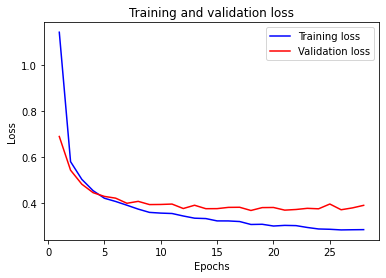

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

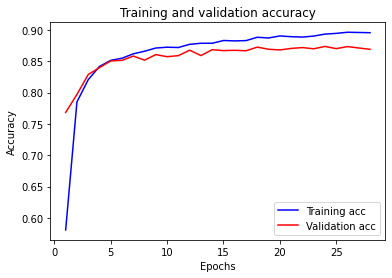

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8630
test loss: 0.39275121688842773
test_accuracy: 0.8629999756813049


# k-fold 교차 검증

최적의 성능을 가지는 model인지 확인하기 위하여 K-fold-cross-validation을 시행한다.캐글에 있는 코드를 참고하였다.

알고리즘을 학습시키기 위해 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하다. 하지만 이는 과적합의 약점을 갖는다. 과적합은 모델이 학습데이터에만 최적화되어 예측데이터에는 성능이 떨어지는 것을 의미한다. 따라서 K폴드 교차 검증을 사용하여 과적합 문제를 극복하고자 한다.

k폴드 교차 검증은 k개의 데이터 폴드 세트를 만들어 k번 만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다. k=6일 경우 6개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하여 6번의 수행을 하고 이것의 평균 결과를 가지고 예측 성능 평가를 한다. 
다음과 같은 과정을 거친다. 

1.데이터 세트를 6등분한다. 

2. 1~5 등분은 학습데이터로 6번째 등분을 검증 데이터 세트로 설정하고 평가를 수행한다. 

3. 1~4, 6등분을 학습데이터로, 5번 등분을 검증 데이터로 설정하고 평가를 수행한다. 

4. 학습데이터와 검증 데이터 세트를 점진적으로 변경해가면서 6번 검증을 수행한다 

5. 6개의 예측 평가를 평균해 k폴드 결과로 반영한다. 

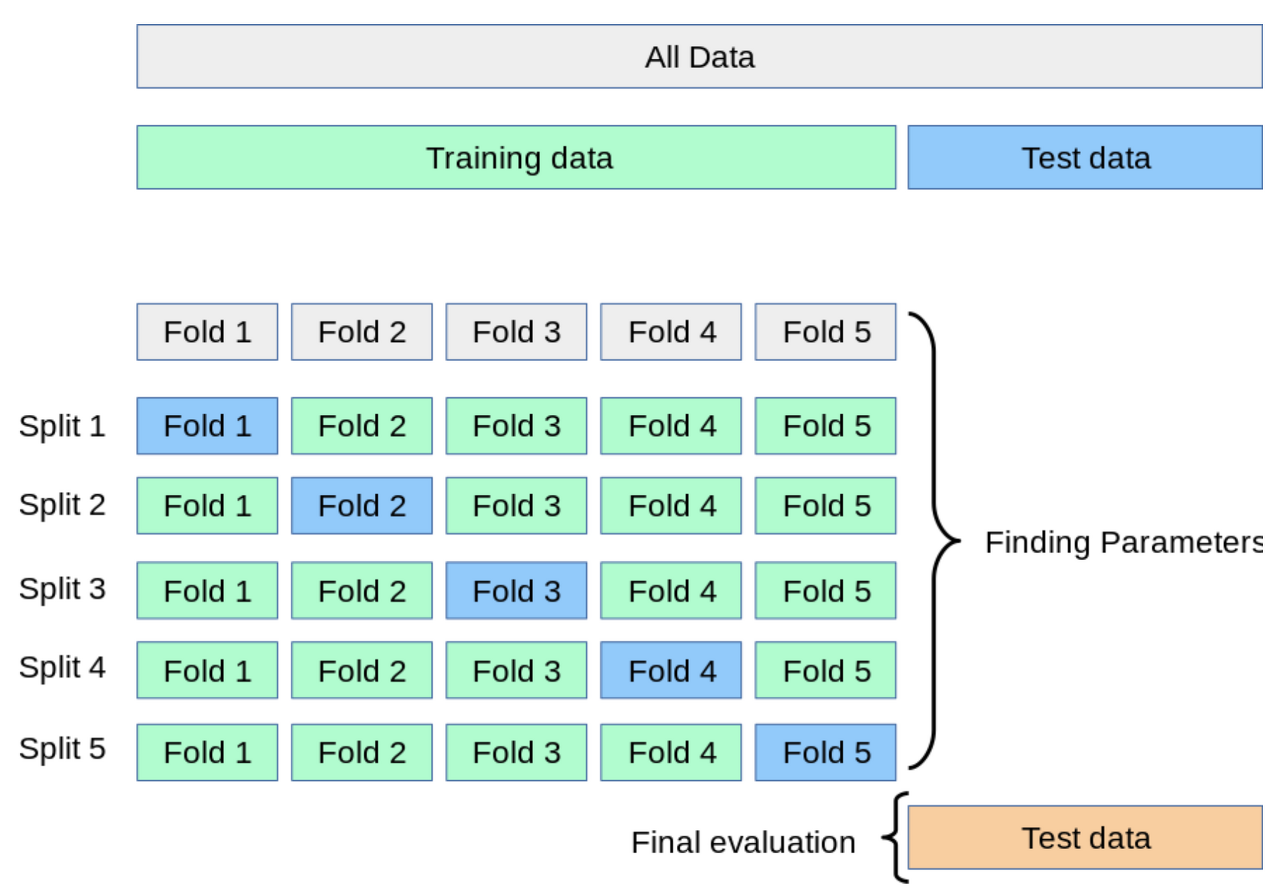

https://velog.io/@qksekf/%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%95%98%EC%9D%B4%ED%8D%BC-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8A%9C%EB%8B%9DETF-Keras-Tuner

https://www.kaggle.com/code/rakaputrawidyasf/fashion-mnist-with-k-fold-cross-validation

https://blog.naver.com/PostView.naver?blogId=sjy5448&logNo=222427780700&parentCategoryNo=153&categoryNo=&viewDate=&isShowPopularPosts=true&from=search

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

import seaborn as sn
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train_set=pd.read_csv('/content/drive/Shareddrives/데마 팀플 2/HW8/fashion-mnist_train.csv')   #데이터셋 불러오기
testing_set=pd.read_csv('/content/drive/Shareddrives/데마 팀플 2/HW8/fashion-mnist_test.csv')   #데이터셋 불러오기

데이터를 train_set와 testing_set로 나누어서 진행한다

In [ ]:
train_set.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [ ]:
testing_set.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [ ]:
train_set = np.array(train_set, dtype="float32")
testing_set = np.array(testing_set, dtype="float32")

In [ ]:
# For data
X = (train_set[:, 1:])/255.0
y = train_set[:, 0]

# For labels
X_test = (testing_set[:, 1:])/255.0
y_test = testing_set[:, 0]

In [ ]:
input_size = (28, 28)
input_shape = (28, 28, 1)

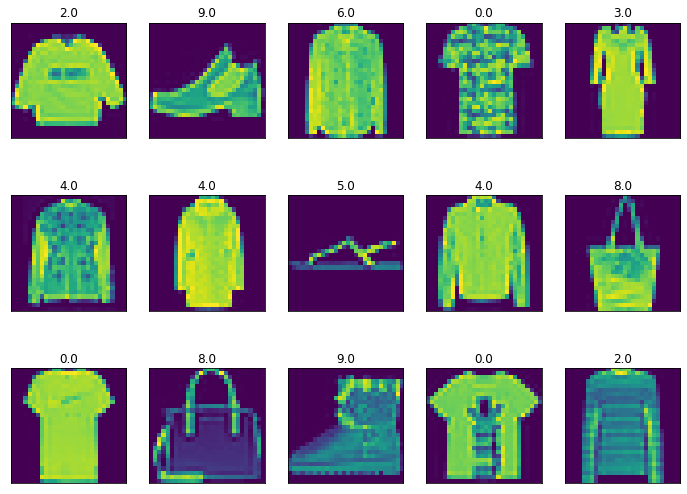

In [ ]:
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(input_size))
    plt.title(y[i])
plt.show()

In [ ]:
print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def sequential_model(input_shape):
    model = keras.Sequential([
    keras.layers.Dense(32, activation = 'relu', input_shape=(28*28,)), # Hidden layer & Input layer (28x28개의 input을 받음)
    keras.layers.Dense(8, activation = 'relu'), # Hidden layer
    keras.layers.Dense(10, activation = 'softmax'), # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
    ])
    
    # Optimizer
    model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

앞에서 구한 최적 성능모델인  hidden layer 2개 (노드: 각 32개, 8개),optimizer= Adam으로 모델을 설정한다.


In [ ]:
k = 6
cross_val = KFold(k, shuffle=True, random_state=1)
fold_count = 1

# For training epochs
epochs = 32

# For loss & acc plotting
histories = []

# For testing/evaluation acc scores
eval_scores = []

# For callbacks
es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss",
                                          mode="min",
                                          verbose=1,
                                          patience=4)

k-fold에서 k=6, 즉 data를 6개의 Fold로 나눈 후 

각 Fold마다 학습과 검증을 진행한다.



In [ ]:
for train, validation in cross_val.split(X):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1
    
    model = sequential_model(input_shape)
    
    X_train, y_train = X[train], y[train]
    X_val, y_val = X[validation], y[validation]
    
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        callbacks=[es_callbacks])
    
    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(X_test, y_test)
    
    histories.append(history)
    eval_scores.append(eval_accuracy)
    print("_"*80)

Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/32


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 7s 3ms/step - loss: 0.7763 - accuracy: 0.7389 - val_loss: 0.4968 - val_accuracy: 0.8302
Epoch 2/32
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4641 - accuracy: 0.8386 - val_loss: 0.4382 - val_accuracy: 0.8487
Epoch 3/32
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4240 - accuracy: 0.8519 - val_loss: 0.4315 - val_accuracy: 0.8475
Epoch 4/32
1563/1563 [==============================] - 5s 4ms/step - loss: 0.3946 - accuracy: 0.8628 - val_loss: 0.4003 - val_accuracy: 0.8612
Epoch 5/32
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3729 - accuracy: 0.8680 - val_loss: 0.3789 - val_accuracy: 0.8671
Epoch 6/32
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3577 - accuracy: 0.8725 - val_loss: 0.4163 - val_accuracy: 0.8521
Epoch 7/32
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3429 - accuracy: 0.8777 - val_loss: 0.3699 - val_accuracy: 0.8698
Epo

Early Stopping Model을 적용하여 각 Fold마다 Epoch를 진행한다

Fold1 

Epoch=15에서 val_loss가 0.3433으로 최솟값을 가지고 그 후 4번의 Epoch에서 그 값이 더 작아지지 않앗기 때문에 Model을 Early Stop 한다. 

최적 Epoch=15일때 loss: 0.2876 ,accuracy: 0.8951 , val_loss: 0.3433 ,val_accuracy: 0.8800

Fold2

Epoch=16에서 val_loss가 0.3368로 최솟값을 가지고 그 후 4번의 Epoch에서 그 값이 더 작아지지 않앗기 때문에 Model을 Early Stop 한다. 

최적 Epoch=16일때 loss: 0.2943 , accuracy: 0.8924 , val_loss: 0.3368 , val_accuracy: 0.8815



Fold3 

Epoch=12에서 val_loss가 0.3592로 최솟값을 가지고 그 후 4번의 Epoch에서 그 값이 더 작아지지 않앗기 때문에 Model을 Early Stop 한다. 

최적 Epoch=12일때 loss: 0.3021 , accuracy: 0.8915 , val_loss: 0.3592 ,val_accuracy: 0.8744


Fold4 

Epoch=10에서 val_loss가 0.3646으로 최솟값을 가지고 그 후 4번의 Epoch에서 그 값이 더 작아지지 않앗기 때문에 Model을 Early Stop 한다. 

최적 Epoch=10일때 loss: 0.3207 , accuracy: 0.8843 , val_loss: 0.3646 ,val_accuracy: 0.8759

Fold5 

Epoch=16에서 val_loss가 0.3451로 최솟값을 가지고 그 후 4번의 Epoch에서 그 값이 더 작아지지 않앗기 때문에 Model을 Early Stop 한다. 

최적 Epoch=16일때 loss: 0.2806 , accuracy: 0.8980 , val_loss: 0.3451 , val_accuracy: 0.8773

Fold6 

Epoch=9에서 val_loss가 0.3601로 최솟값을 가지고 그 후 4번의 Epoch에서 그 값이 더 작아지지 않앗기 때문에 Model을 Early Stop 한다. 

최적 Epoch=9일때 loss: 0.3242 , accuracy: 0.8816 , val_loss: 0.3601 ,val_accuracy: 0.8732

6개의 K-fold를 모델에 적용시켜본 결과


Fold 6이 최적 Epoch 9로 가장 낮고 , FOLD 2,5가 최적 Epoch가 16으로 가장 컸다.

Epoch가 클수록 accuracy, val_accuracy는 컸으며, loss와 val_loss는 감소하였다.

같은 최적 Epoch를 갖는 Fold 2와 Fold 5를 비교해봤을 때

Fold2가  accuracy와 val_accuracy가 더 높았고 loss와 val_loss는 더 낮았다.

각 Fold의 Accuracy와 Loss를 graph로 좀더 자세히 알아보고자 한다. 

In [ ]:
def display_kfold_result(history, k=1):
    # Train & Val Loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Train & Val Accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(loss, label="Training")
    plt.plot(val_loss, label="Validation")
    plt.legend(loc="upper right")
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(accuracy, label="Training")
    plt.plot(val_accuracy, label="Validation")
    plt.legend(loc="lower right")
    
    plt.suptitle("Fold-{}".format(k))
    plt.show()

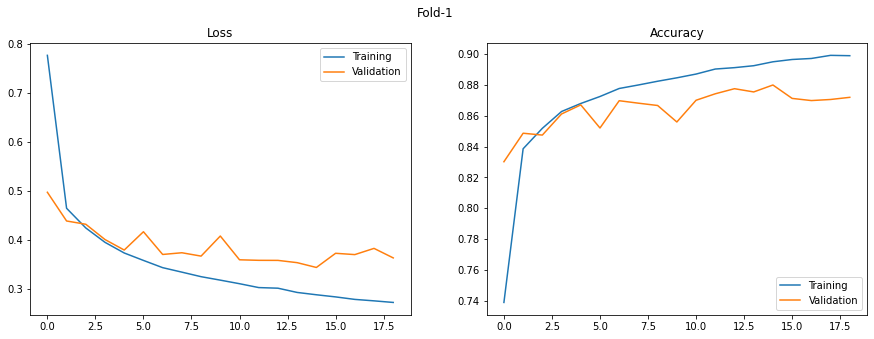

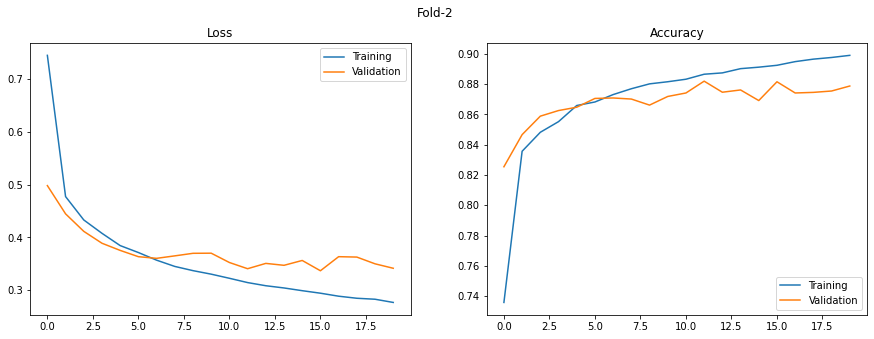

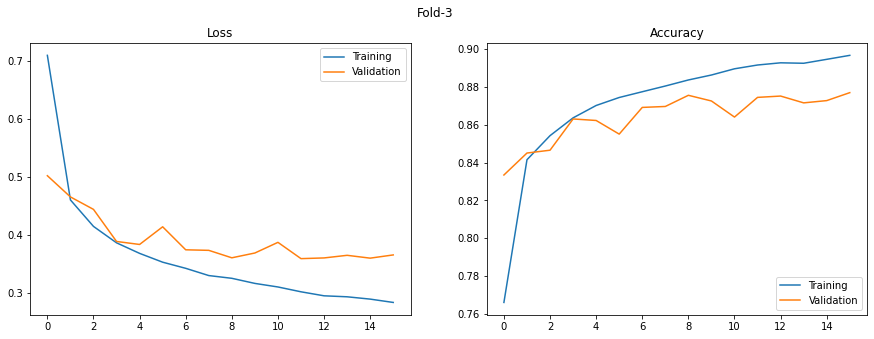

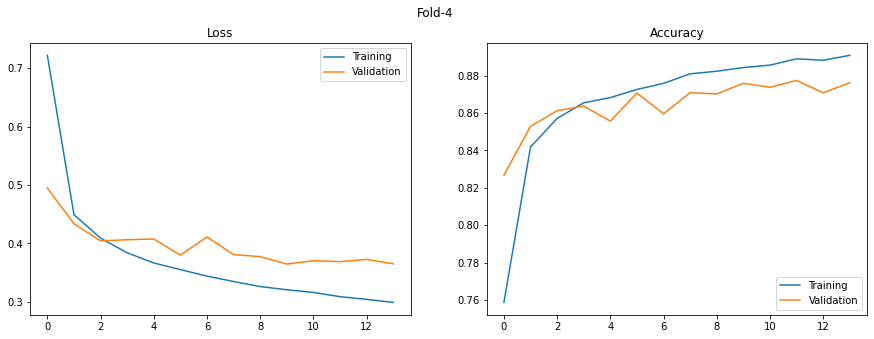

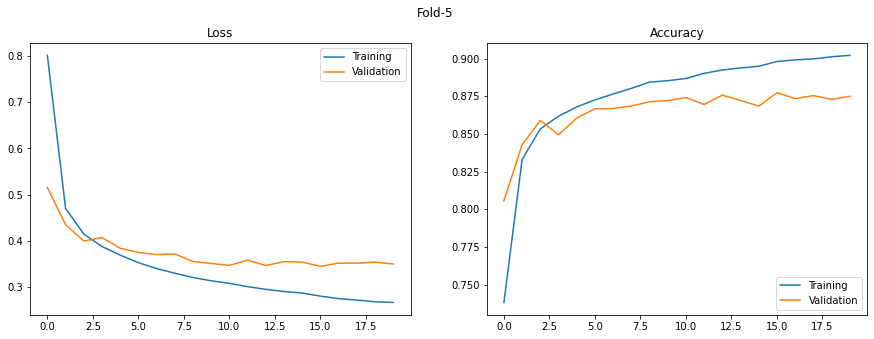

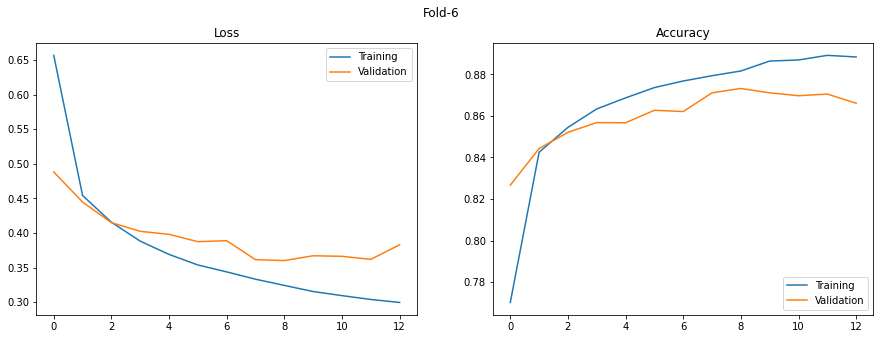

In [ ]:
# Displaying the graph results

for history in histories:
    display_kfold_result(history, (histories.index(history)+1))

먼저 Loss 관점에서 봤을 때

가장 Trainng loss와 Validation loss가 떨어져 모델 성능이 떨어질 것으로 에상되는 Fold는 Fold 1과 Fold 6이다

Fold1은 val_loss가 Epoch 15를 기준으로 오히려 크게 증가하며 Training과 차이가 벌어졌으며

Fold6은 val_loss가 Epoch 8을 기준으로 오히려 조금씩 증가하다 11부터 크게 증가하여 Training과 차이가 크게 벌어졌다..

Fold 2,4가 Epoch가 거의 다 증가했을 때 val_loss 는 감소하는 추이를 보이기 때문에

성능이 가장 나을 것으로 에상되었다.

Accuracy 관점에서 봤을 때 

가장 Trainng accuracy와 Validation accuracy가 떨어져 모델 성능이 떨어질 것으로 에상되는 Fold는 Fold 1과 Fold 6이다

Fold1은 val_loss가 Epoch 15를 기준으로 오히려 감소하며 Training과 차이가 벌어졌으며

Fold6은 val_loss가 Epoch 9를 기준으로 오히려 감소하며 Training과 차이가 크게 벌어졌다

Fold 2, 5 가 Epoch가 낮은 구간에서도 다른 Fold들은 Training과 Validation의 차이가 큰 데에 비하여 차이가 크지 않고 , 

Epoch가 거의 다 증가했을 때 val_accuracy 는 증가하는 추이를 보이기 때문에

성능이 가장 나을 것으로 에상되었다.

따라서 종합적으로 Fold 1,6의 성능이 가장 안좋았다.

Fold 2의 성능이 가장 좋았다

Fold 4,5가 그 다음으로 성능이 좋았다.

Fold 6이 Fold1보다 평가점수가 낮은 이유는 Val_loss 관점에서 Epoch가 클때 Val_loss가 많이 커진점이 주요 이유로 생각된다.


실세 평가 점수를 통하여 각 Fold의 성능 순위를 평가하고자 한다.

In [ ]:
i = 0
float2 = "{0:.2f}"
for score in eval_scores:
    percent = score * 100
    print("Fold-{}: {}%".format(i+1, float2.format(percent)))
    i = i + 1

Fold-1: 86.84%
Fold-2: 87.95%
Fold-3: 87.39%
Fold-4: 87.45%
Fold-5: 87.74%
Fold-6: 86.69%


Fold 2가 가장 평가점수가 높았으며 

Fold 6이 가장 평가점수가 낮았고 그 다음으로 Fold1의 평가 점수가 낮았다

Fold2 다음으로 평가 점수가 높았던건 Fold 5이며 그 다음으로 Fold4, Fold3 순이였다

Fold 6이 Fold 1 보다 평가점수가 낮은 이유는 Val_loss 관점에서 Epoch가 클때 Val_loss가 많이 커진점이 주요 이유로 생각된다.

Fold 5가 Fold 4 보다 평가점수가 높았던 이유는 Val_Accuracy가 Epoch가 작을 때 Training_Accuracy와 차이가 별로 나지 않았던 점이 주요 이유로 생각된다.


최종 모델: hidden layer 2개 (노드: 각 32개, 8개), lr:0.01, batch size:1024, epoch: 16, optimizer: Adam

(그때 loss: 0.2943 , accuracy: 0.8924 , val_loss: 0.3368 , val_accuracy: 0.8815)

6개의 폴드의 평균을 계산한결과 0.87343으로 교차검증을 하지 않았을때  0.8629999 비해서 0.0104 정도 증가하였다. 이는 과적합 문제를 해결하여 정확도가 올라간것이다. 